In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 


# Visualization of Games Data

In [2]:
gamesdata = pd.read_json('datasets/cleaned_steam_games.json')
gamesdata.head()

,name,all_reviews,release_date,developer,publisher,popular_tags,languages,achievements,genre,mature_content,original_price,discount_price
0,DOOM,92,2016-05-12,id Software,"Bethesda Softworks,Bethesda Softworks","[Great Soundtrack, Action, Demons, Atmospheric...","[Polish, Russian, German, Spanish - Spain, Por...",54,[Action],False,19.99,14.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,49,2017-12-21,PUBG Corporation,"PUBG Corporation,PUBG Corporation","[PvP, Battle Royale, Action, Strategy, Surviva...","[Polish, Simplified Chinese, Portuguese, Korea...",37,"[Massively Multiplayer, Action, Adventure]",True,29.99,NaN
2,BATTLETECH,71,2018-04-24,Harebrained Schemes,"Paradox Interactive,Paradox Interactive","[Futuristic, Great Soundtrack, Action, Story R...","[French, English, Russian, German]",128,"[Strategy, Action, Adventure]",False,39.99,NaN
3,DayZ,61,2018-12-13,Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","[PvP, Action, Open World, Survival, Atmospheri...","[Simplified Chinese, Russian, German, Spanish ...",0,"[Massively Multiplayer, Action, Adventure]",False,44.99,NaN
4,EVE Online,74,2003-05-06,CCP,"CCP,CCP","[PvP, Economy, Action, MMORPG, Open World, Spa...","[French, English, Russian, German]",0,"[Massively Multiplayer, Action, Strategy, Free...",False,0.00,NaN


In [3]:
gamesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17311 entries, 0 to 17310
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            17311 non-null  object 
 1   all_reviews     17311 non-null  int64  
 2   release_date    17311 non-null  object 
 3   developer       17222 non-null  object 
 4   publisher       16600 non-null  object 
 5   popular_tags    17294 non-null  object 
 6   languages       17310 non-null  object 
 7   achievements    17311 non-null  int64  
 8   genre           17195 non-null  object 
 9   mature_content  17311 non-null  bool   
 10  original_price  16949 non-null  float64
 11  discount_price  6303 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 1.5+ MB


In [4]:
gamesdata.describe()

,all_reviews,achievements,original_price,discount_price
count,17311.000000,17311.000000,16949.000000,6303.000000
mean,74.719427,47.854370,15.121901,62.294338
std,18.554867,367.978294,45.646142,122.249582
min,0.000000,0.000000,0.000000,0.000000
25%,64.000000,0.000000,2.990000,10.360000
50%,79.000000,4.000000,6.990000,24.770000
75%,89.000000,25.000000,14.990000,55.380000
max,100.000000,9821.000000,624.740000,962.600000


Some of the original price and discount price are NaN. For the original price, We replace NaN with 6.99 which is the median of original price. For discount price, we replace NaN with its respective original price.

In [5]:
gamesdata['original_price'] = gamesdata['original_price'].fillna(6.99)
gamesdata['discount_price'] = gamesdata['discount_price'].fillna(gamesdata['original_price'])
gamesdata = gamesdata[(gamesdata['original_price'] >= gamesdata['discount_price'])]

gamesdata['discount_percentage'] = (gamesdata['original_price'] - gamesdata['discount_price'])/gamesdata['original_price'] * 100
gamesdata['discount_percentage'] = gamesdata['discount_percentage'].fillna(0)


In [6]:
gamesdata.describe()

,all_reviews,achievements,original_price,discount_price,discount_percentage
count,12440.000000,12440.000000,12440.000000,12440.000000,12440.000000
mean,73.785852,43.798151,16.846749,11.593586,6.097715
std,18.786190,356.285345,52.811188,27.518220,19.082522
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.000000,0.000000,1.990000,1.990000,0.000000
50%,78.000000,0.000000,6.990000,6.990000,0.000000
75%,88.000000,22.000000,14.990000,13.990000,0.000000
max,100.000000,5000.000000,624.740000,424.720000,100.000000


## Numerical data

In [7]:
numericalgames = gamesdata[['all_reviews', 'achievements', 'original_price', 'discount_price', 'discount_percentage']]
numericalgames.head(10)

,all_reviews,achievements,original_price,discount_price,discount_percentage
0,92,54,19.99,14.99,25.012506
1,49,37,29.99,29.99,0.000000
2,71,128,39.99,39.99,0.000000
3,61,0,44.99,44.99,0.000000
4,74,0,0.00,0.00,0.000000
7,85,34,29.99,29.99,0.000000
8,44,43,49.99,49.99,0.000000
9,83,72,19.99,19.99,0.000000
11,78,0,0.00,0.00,0.000000
13,75,0,19.99,19.99,0.000000


In [8]:
numericalgames.describe()

,all_reviews,achievements,original_price,discount_price,discount_percentage
count,12440.000000,12440.000000,12440.000000,12440.000000,12440.000000
mean,73.785852,43.798151,16.846749,11.593586,6.097715
std,18.786190,356.285345,52.811188,27.518220,19.082522
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.000000,0.000000,1.990000,1.990000,0.000000
50%,78.000000,0.000000,6.990000,6.990000,0.000000
75%,88.000000,22.000000,14.990000,13.990000,0.000000
max,100.000000,5000.000000,624.740000,424.720000,100.000000


Text(0.5, 0, 'discount_percentage')

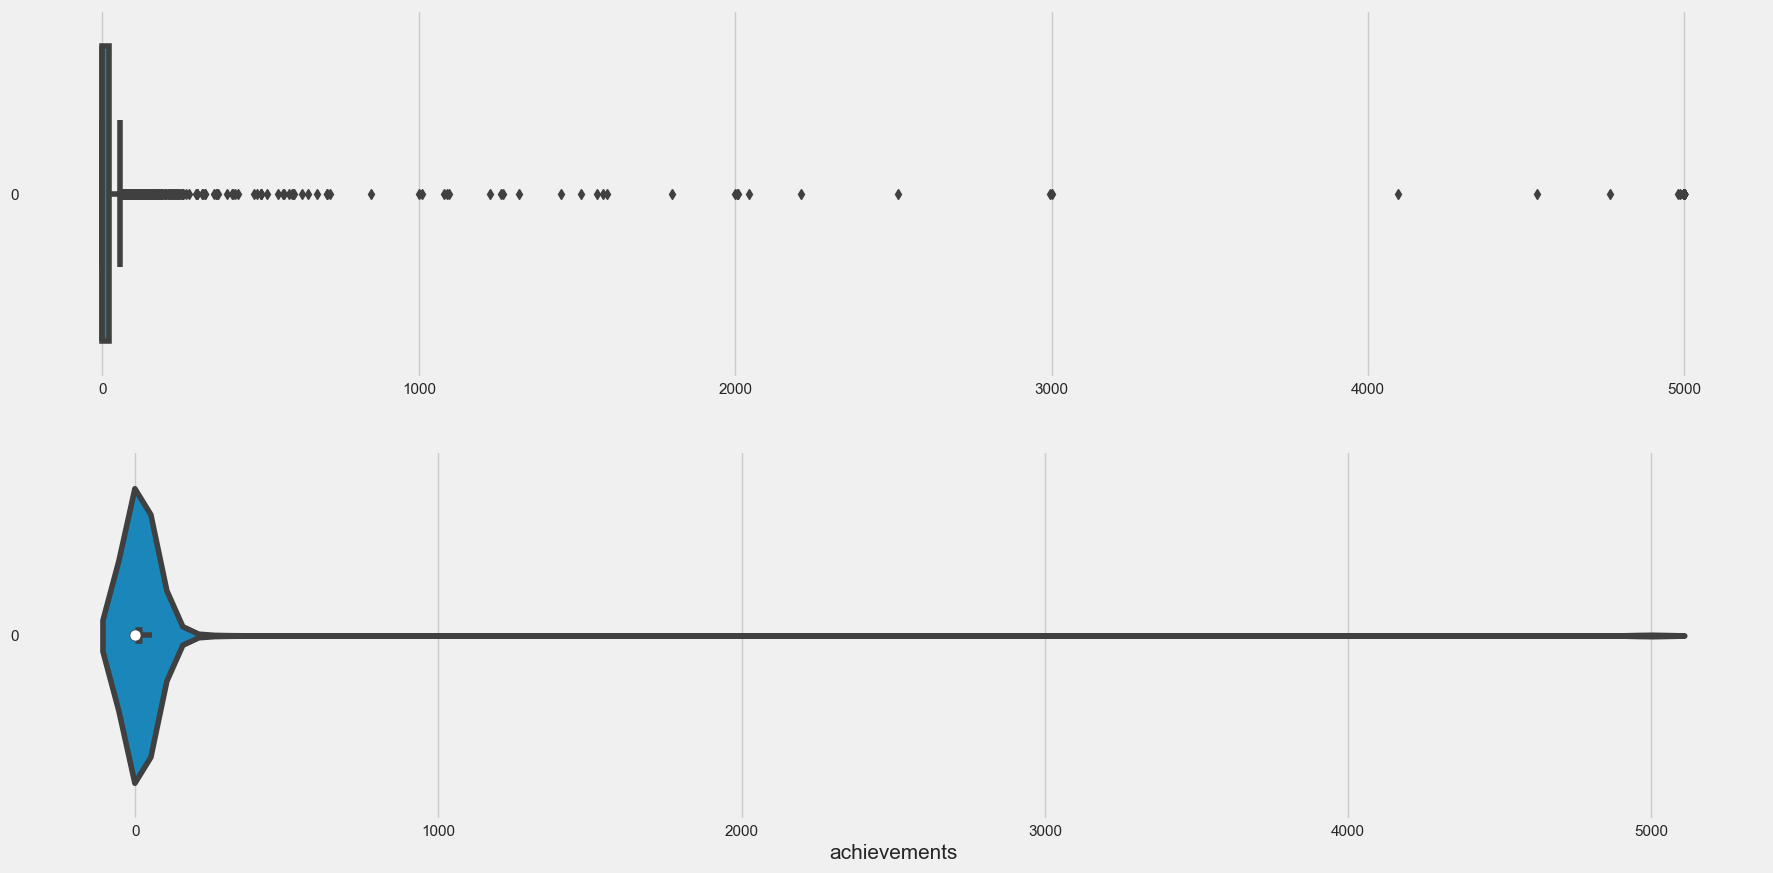

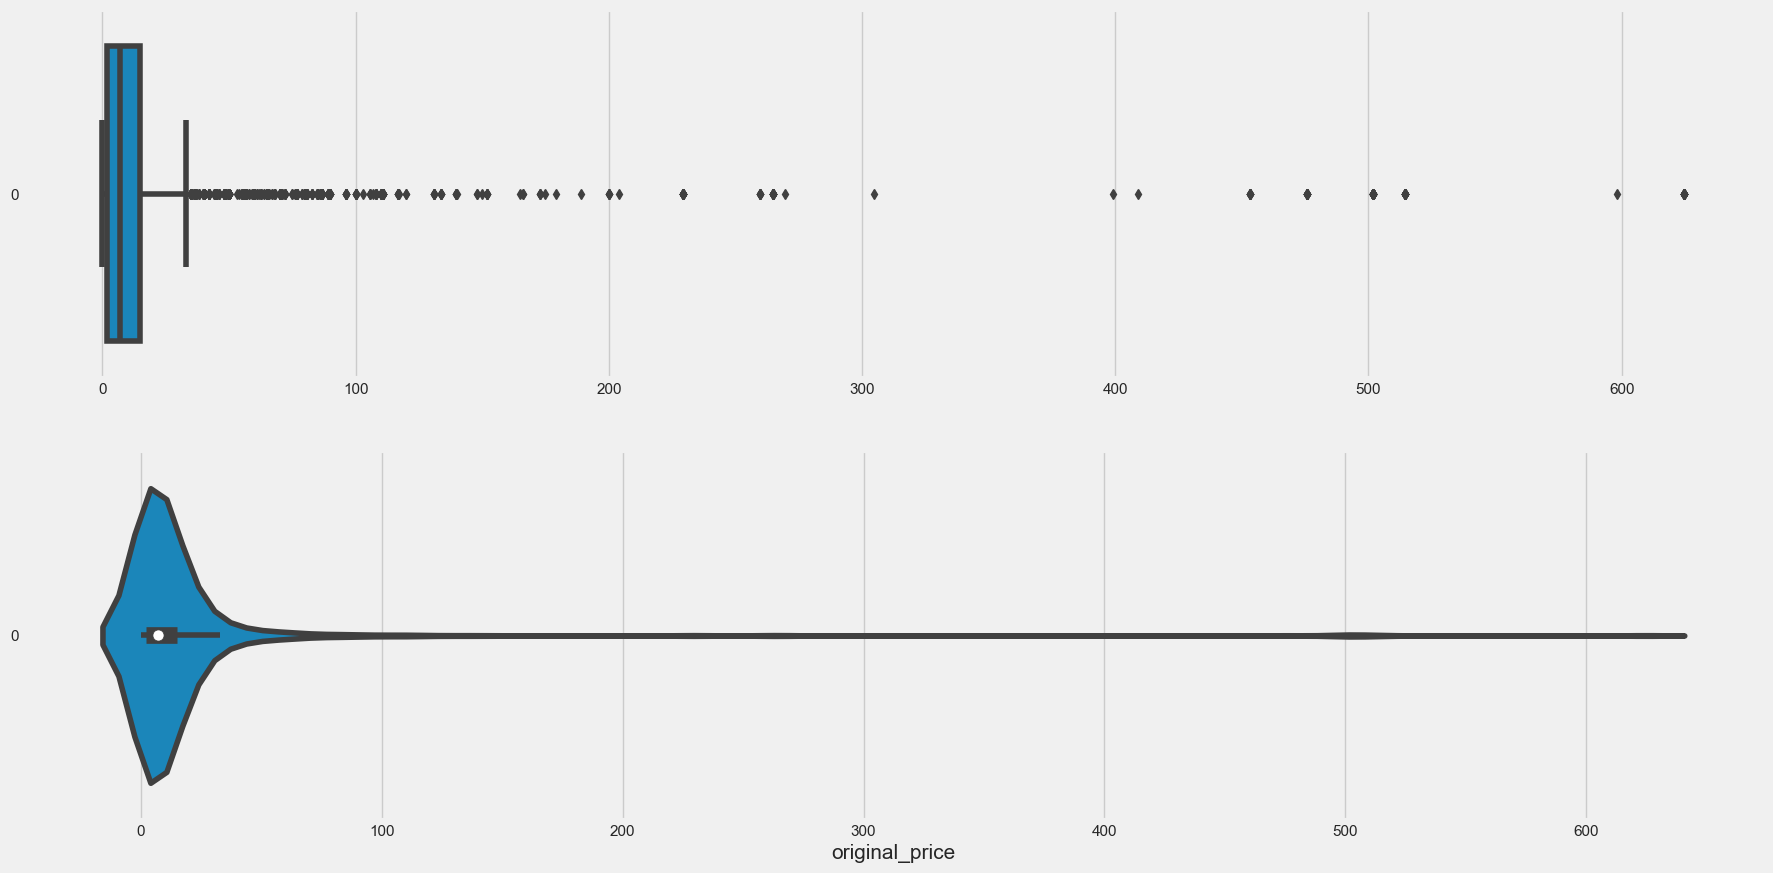

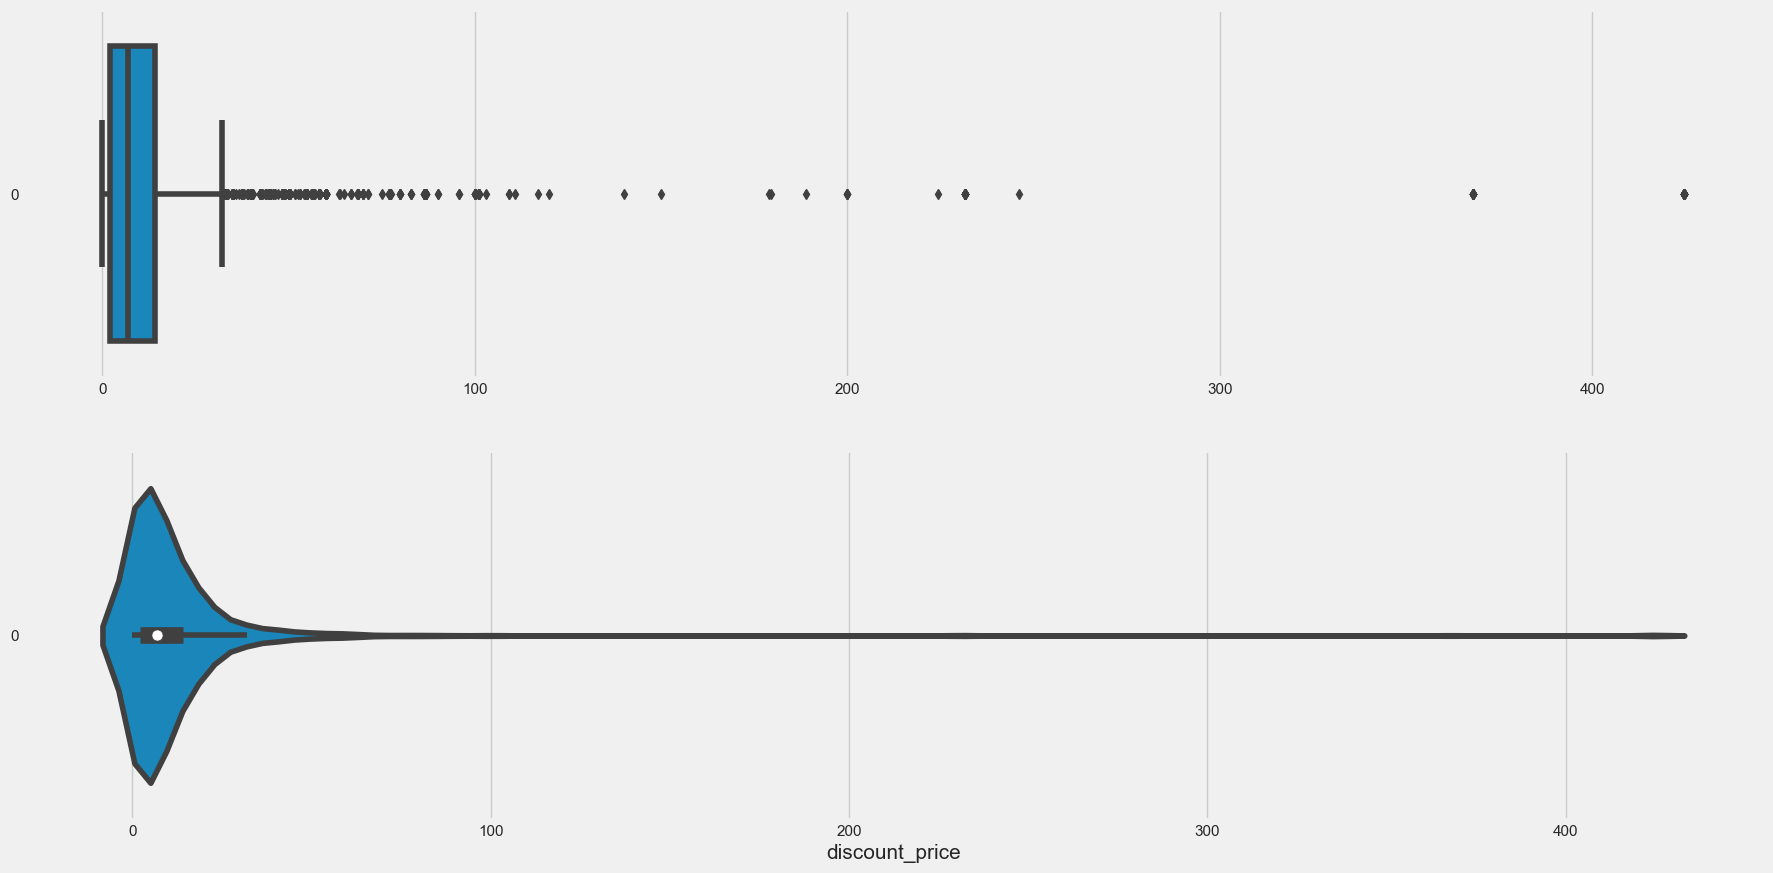

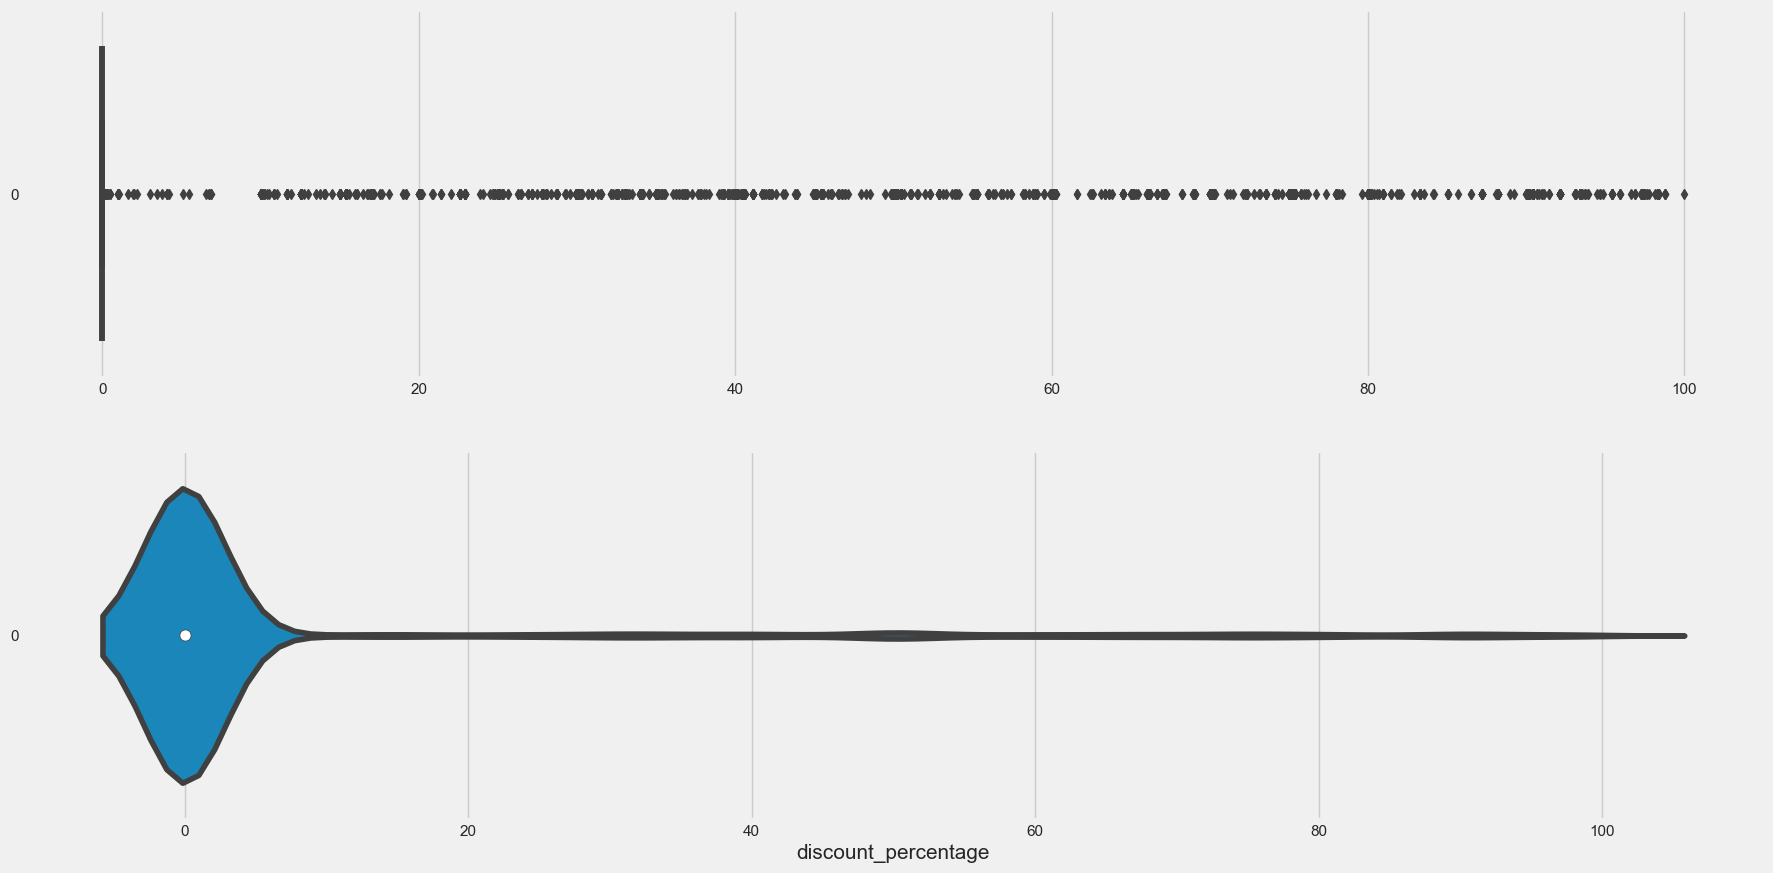

In [9]:
# Draw the distributions of all numerical variables except for all_reviews

# Plots for achievements
f, axes = plt.subplots(2,1,figsize=(20,10))

sb.boxplot(data = numericalgames['achievements'], orient = "h", ax = axes[0])
sb.violinplot(data = numericalgames['achievements'], orient = "h", ax = axes[1])
axes[1].set_xlabel('achievements',fontsize=15)

# Plots for original_price
f, axes = plt.subplots(2,1,figsize=(20,10))

sb.boxplot(data = numericalgames['original_price'], orient = "h", ax = axes[0])
sb.violinplot(data = numericalgames['original_price'], orient = "h", ax = axes[1])
axes[1].set_xlabel('original_price',fontsize=15)

# Plots for discount_price
f, axes = plt.subplots(2,1,figsize=(20,10))

sb.boxplot(data = numericalgames['discount_price'], orient = "h", ax = axes[0])
sb.violinplot(data = numericalgames['discount_price'], orient = "h", ax = axes[1])
axes[1].set_xlabel('discount_price',fontsize=15)

# Plots for discount_percentage
f, axes = plt.subplots(2,1,figsize=(20,10))

sb.boxplot(data = numericalgames['discount_percentage'], orient = "h", ax = axes[0])
sb.violinplot(data = numericalgames['discount_percentage'], orient = "h", ax = axes[1])
axes[1].set_xlabel('discount_percentage',fontsize=15)


In [10]:
# Describe all reviews
numericalgames['all_reviews'].describe()

count    12440.000000
mean        73.785852
std         18.786190
min          0.000000
25%         63.000000
50%         78.000000
75%         88.000000
max        100.000000
Name: all_reviews, dtype: float64

<AxesSubplot:>

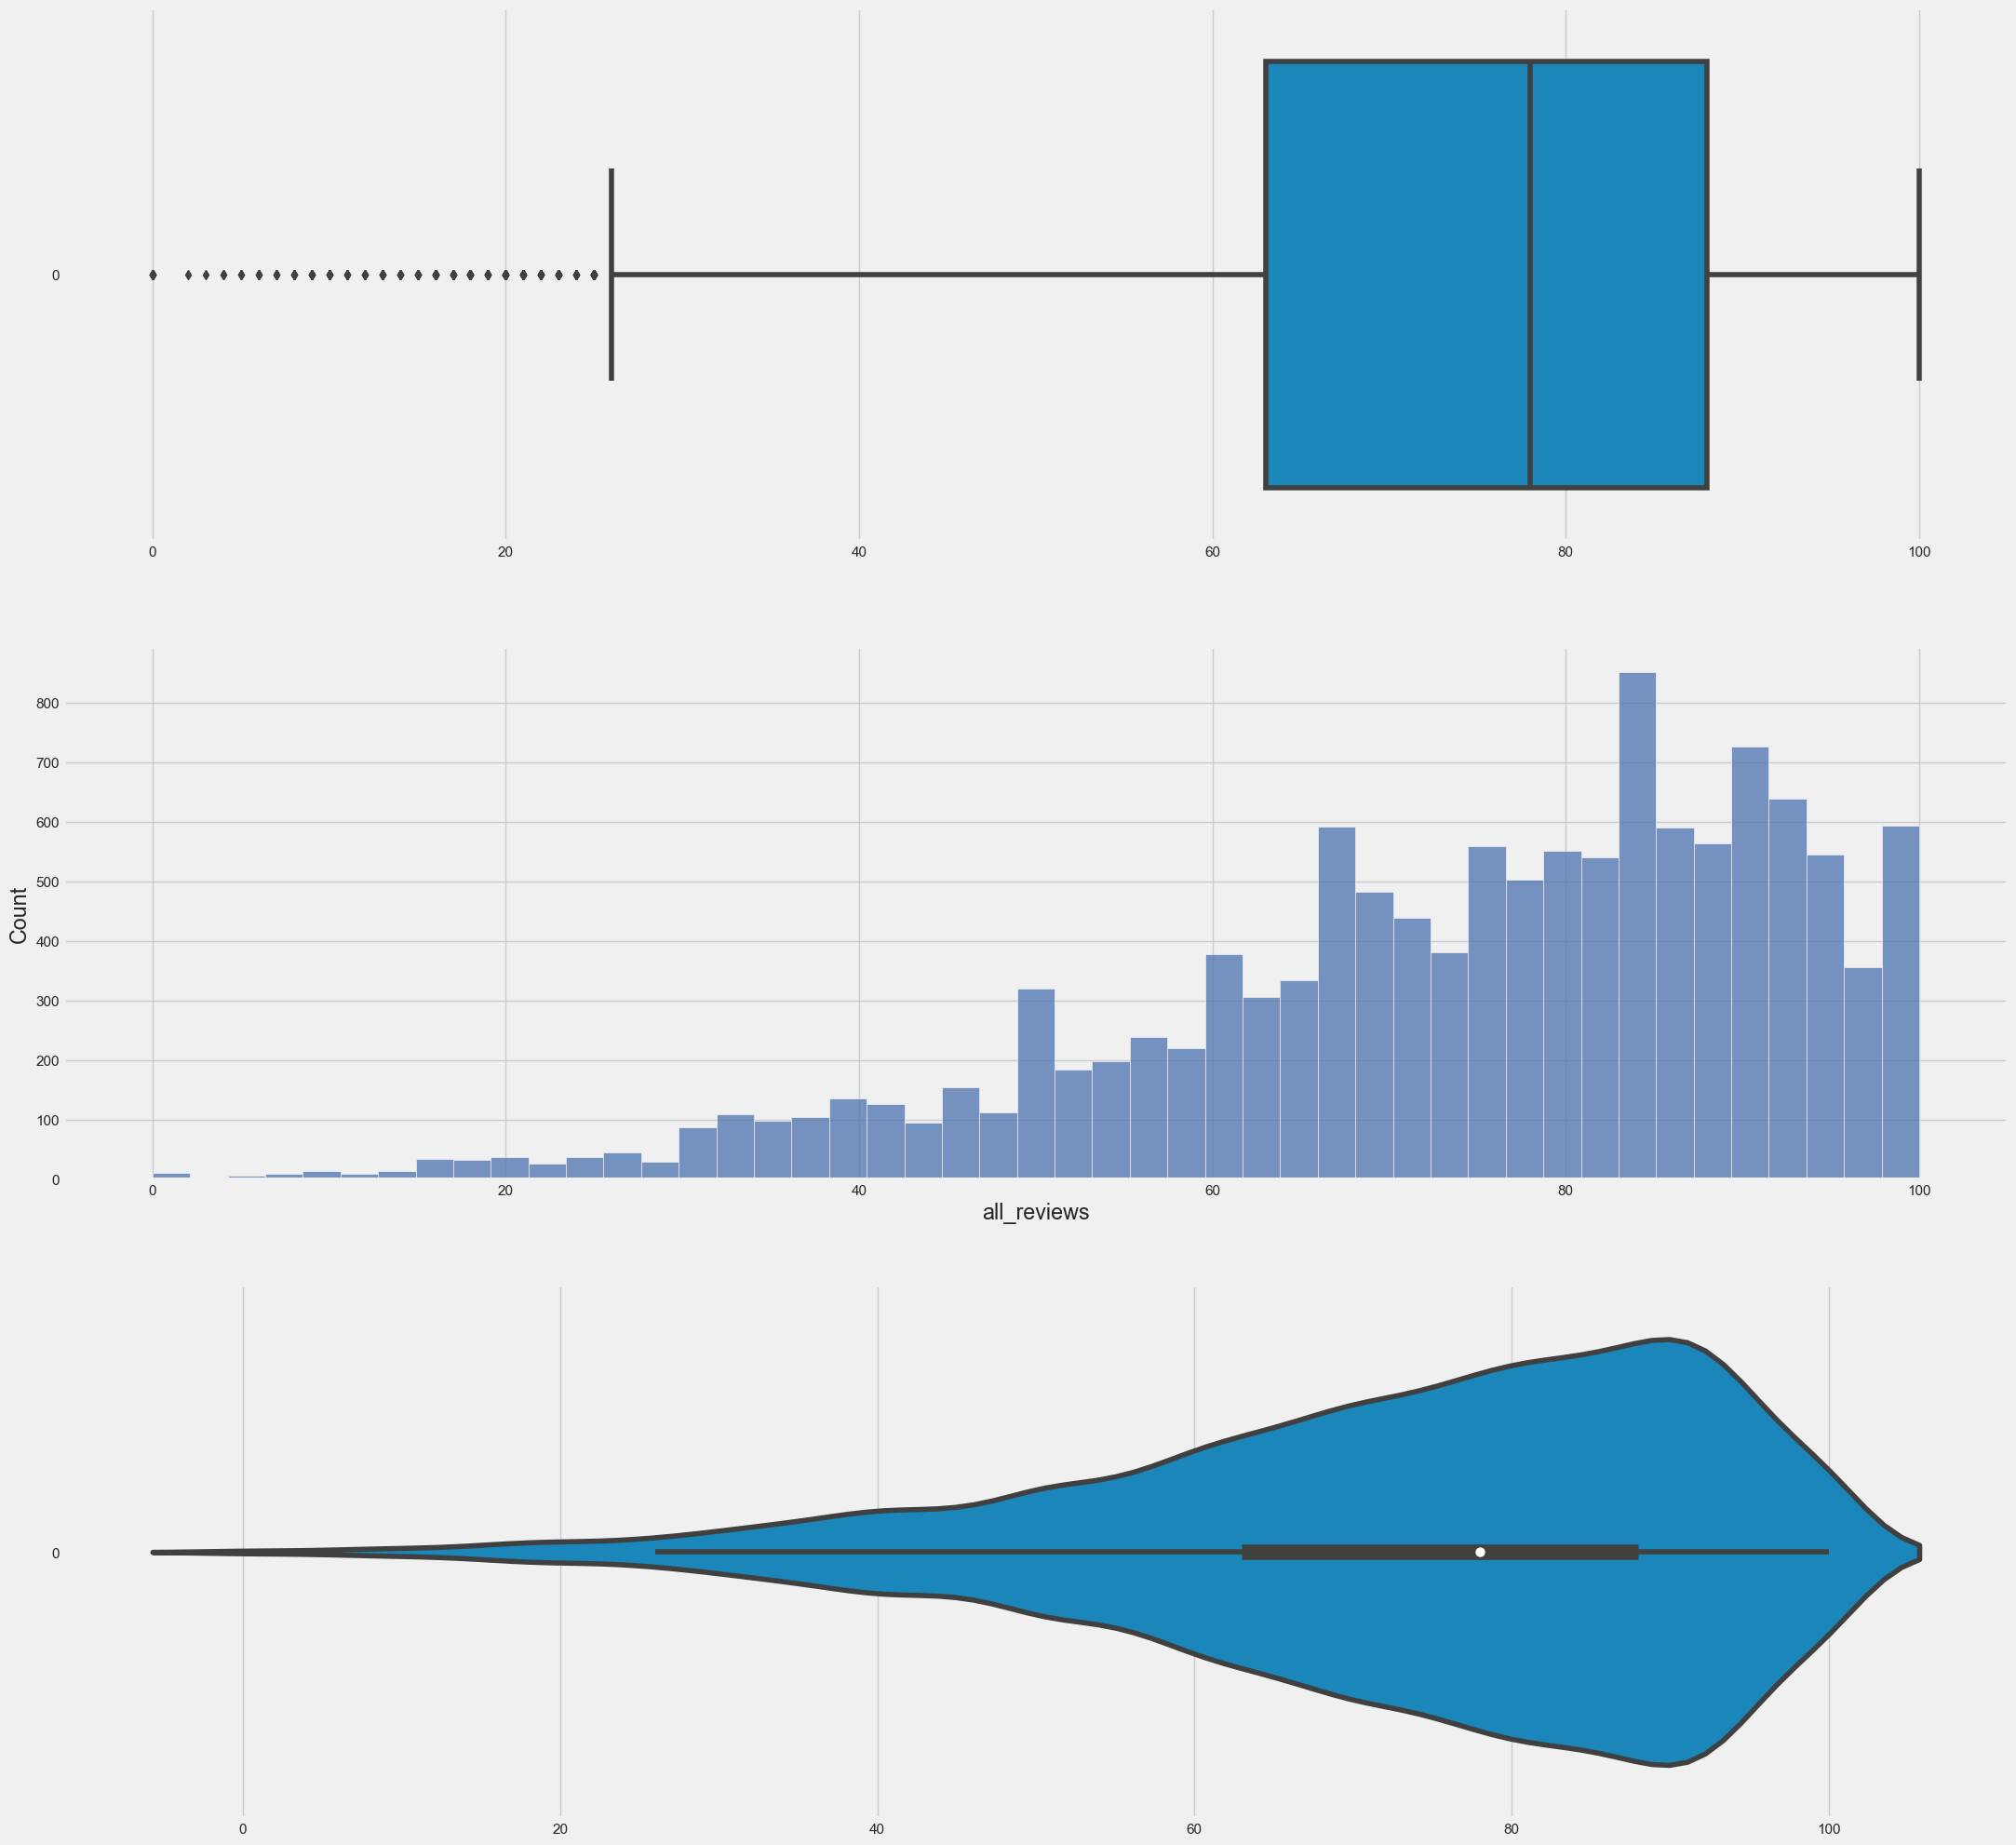

In [11]:
# Plots for all reviews
f, axes = plt.subplots(3,figsize=(24, 24))
sb.boxplot(data = numericalgames['all_reviews'], orient = "h", ax = axes[0])
sb.histplot(data = numericalgames['all_reviews'],ax = axes[1])
sb.violinplot(data = numericalgames['all_reviews'], orient = "h", ax = axes[2])

#### Correlation between numerical variables and all reviews

In [12]:
numericalgames.corr()

,all_reviews,achievements,original_price,discount_price,discount_percentage
all_reviews,1.000000,-0.017720,-0.001266,0.016029,-0.037899
achievements,-0.017720,1.000000,0.396365,0.017666,0.293989
original_price,-0.001266,0.396365,1.000000,0.666244,0.419365
discount_price,0.016029,0.017666,0.666244,1.000000,0.071571
discount_percentage,-0.037899,0.293989,0.419365,0.071571,1.000000


<AxesSubplot:>

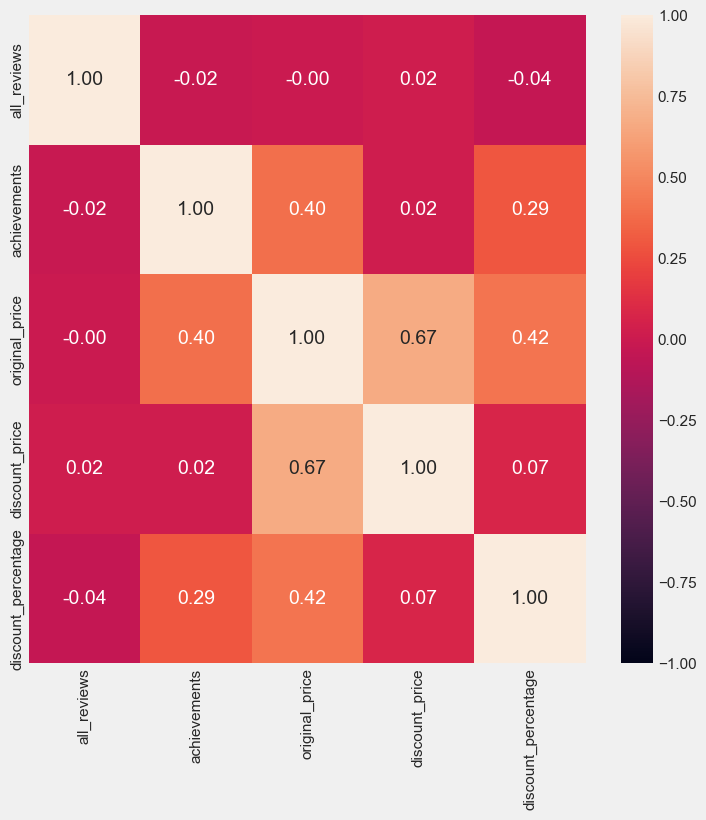

In [13]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(8,8))
sb.heatmap(numericalgames.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

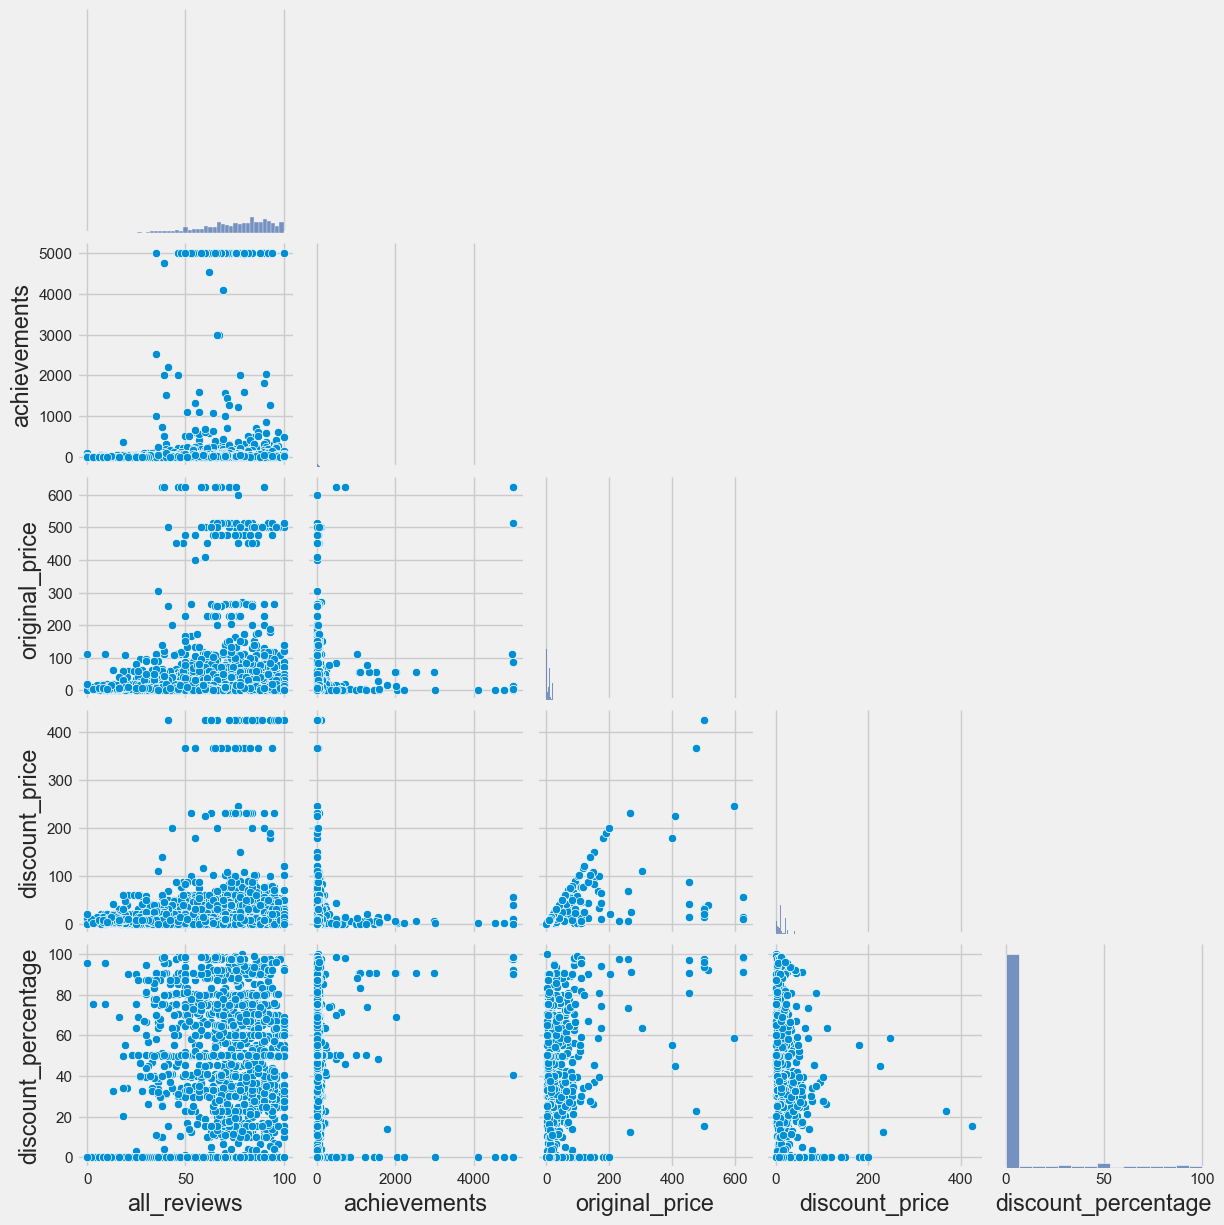

In [14]:
# Pair plot
sb.pairplot(data = numericalgames, corner = True)

## Categorical data

In [15]:
categoricalgames = gamesdata[['developer', 'publisher', 'popular_tags', 'languages', 'genre', 'mature_content', 'all_reviews']]
categoricalgames.head()

,developer,publisher,popular_tags,languages,genre,mature_content,all_reviews
0,id Software,"Bethesda Softworks,Bethesda Softworks","[Great Soundtrack, Action, Demons, Atmospheric...","[Polish, Russian, German, Spanish - Spain, Por...",[Action],False,92
1,PUBG Corporation,"PUBG Corporation,PUBG Corporation","[PvP, Battle Royale, Action, Strategy, Surviva...","[Polish, Simplified Chinese, Portuguese, Korea...","[Massively Multiplayer, Action, Adventure]",True,49
2,Harebrained Schemes,"Paradox Interactive,Paradox Interactive","[Futuristic, Great Soundtrack, Action, Story R...","[French, English, Russian, German]","[Strategy, Action, Adventure]",False,71
3,Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","[PvP, Action, Open World, Survival, Atmospheri...","[Simplified Chinese, Russian, German, Spanish ...","[Massively Multiplayer, Action, Adventure]",False,61
4,CCP,"CCP,CCP","[PvP, Economy, Action, MMORPG, Open World, Spa...","[French, English, Russian, German]","[Massively Multiplayer, Action, Strategy, Free...",False,74


In [16]:
categoricalgames.describe()

,all_reviews
count,12440.000000
mean,73.785852
std,18.786190
min,0.000000
25%,63.000000
50%,78.000000
75%,88.000000
max,100.000000


#### Categorical - mature content

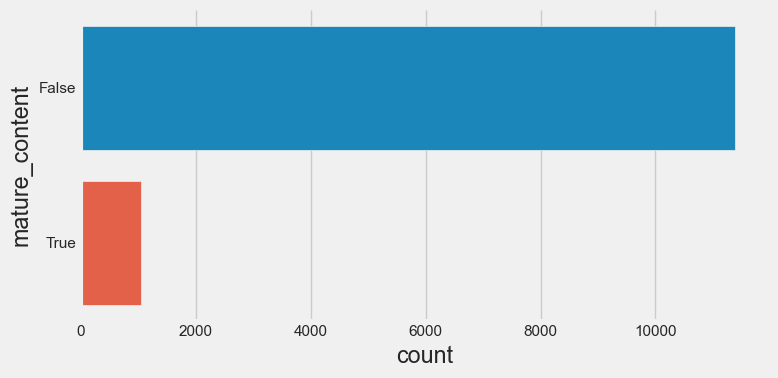

In [17]:
sb.catplot(y = "mature_content", data = categoricalgames, kind = "count", height = 4, aspect = 2) 

<AxesSubplot:xlabel='all_reviews', ylabel='mature_content'>

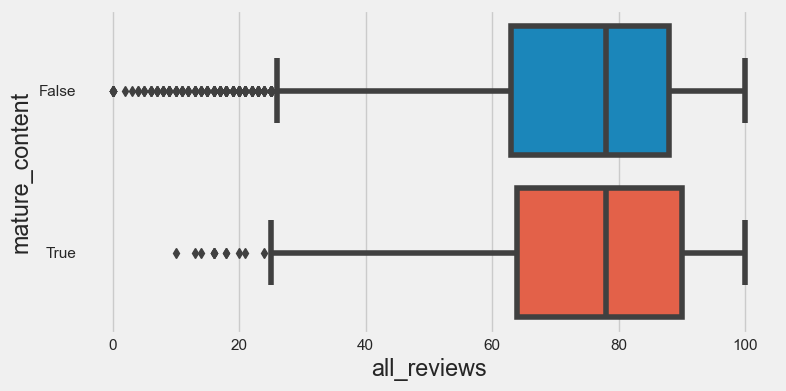

In [18]:
# All reviews vs mature content

f = plt.figure(figsize=(8, 4))
sb.boxplot(x = "all_reviews", y = "mature_content", data = categoricalgames, orient = "h", width = 0.8)

#### Categorical - developer

In [19]:
categoricalgames['developer'].nunique()

8179

In [20]:
categoricalgames['developer'].value_counts()

Dovetail Games                77
KOEI TECMO GAMES CO., LTD.    58
Choice of Games               57
SCS Software                  42
CAPCOM Co., Ltd.              33
                              ..
Evlanic Entertainment          1
Sigtrap                        1
ColePowered Games              1
Invi Games                     1
Phoesion                       1
Name: developer, Length: 8179, dtype: int64

There are many different developer found in this dataset, so we will only be looking at developer who had developed at least 30 games so that it would be at least follow a normal distribution via central limit theorem.

In [21]:
(categoricalgames['developer'].value_counts() >= 30).sum()

7

In [22]:
value_counts = categoricalgames['developer'].value_counts()
to_change = value_counts[value_counts >= 30].index

moredeveloper = categoricalgames[categoricalgames['developer'].isin(to_change)]
moredeveloper['developer'].value_counts()

Dovetail Games                77
KOEI TECMO GAMES CO., LTD.    58
Choice of Games               57
SCS Software                  42
CAPCOM Co., Ltd.              33
Arc System Works              31
RewindApp                     30
Name: developer, dtype: int64

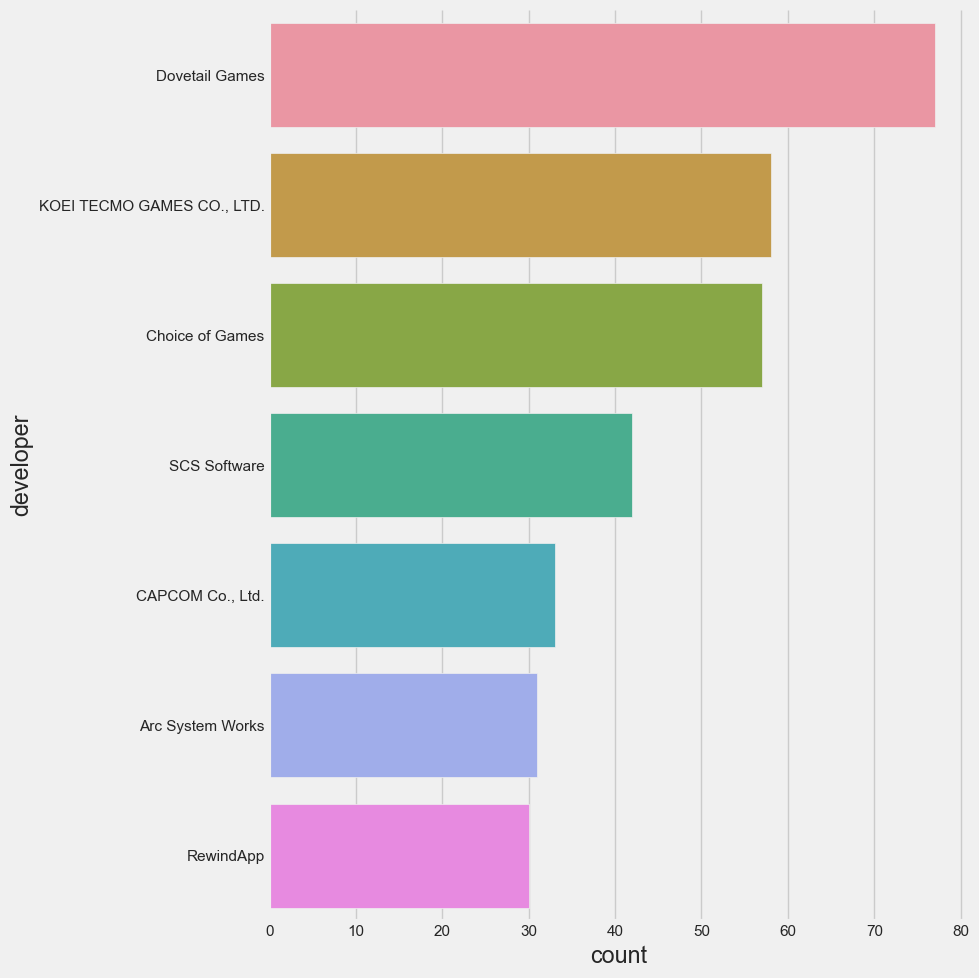

In [23]:
sb.catplot(y = "developer", data = moredeveloper, kind = "count", order = moredeveloper['developer'].value_counts().index, height = 10)

<AxesSubplot:xlabel='all_reviews', ylabel='developer'>

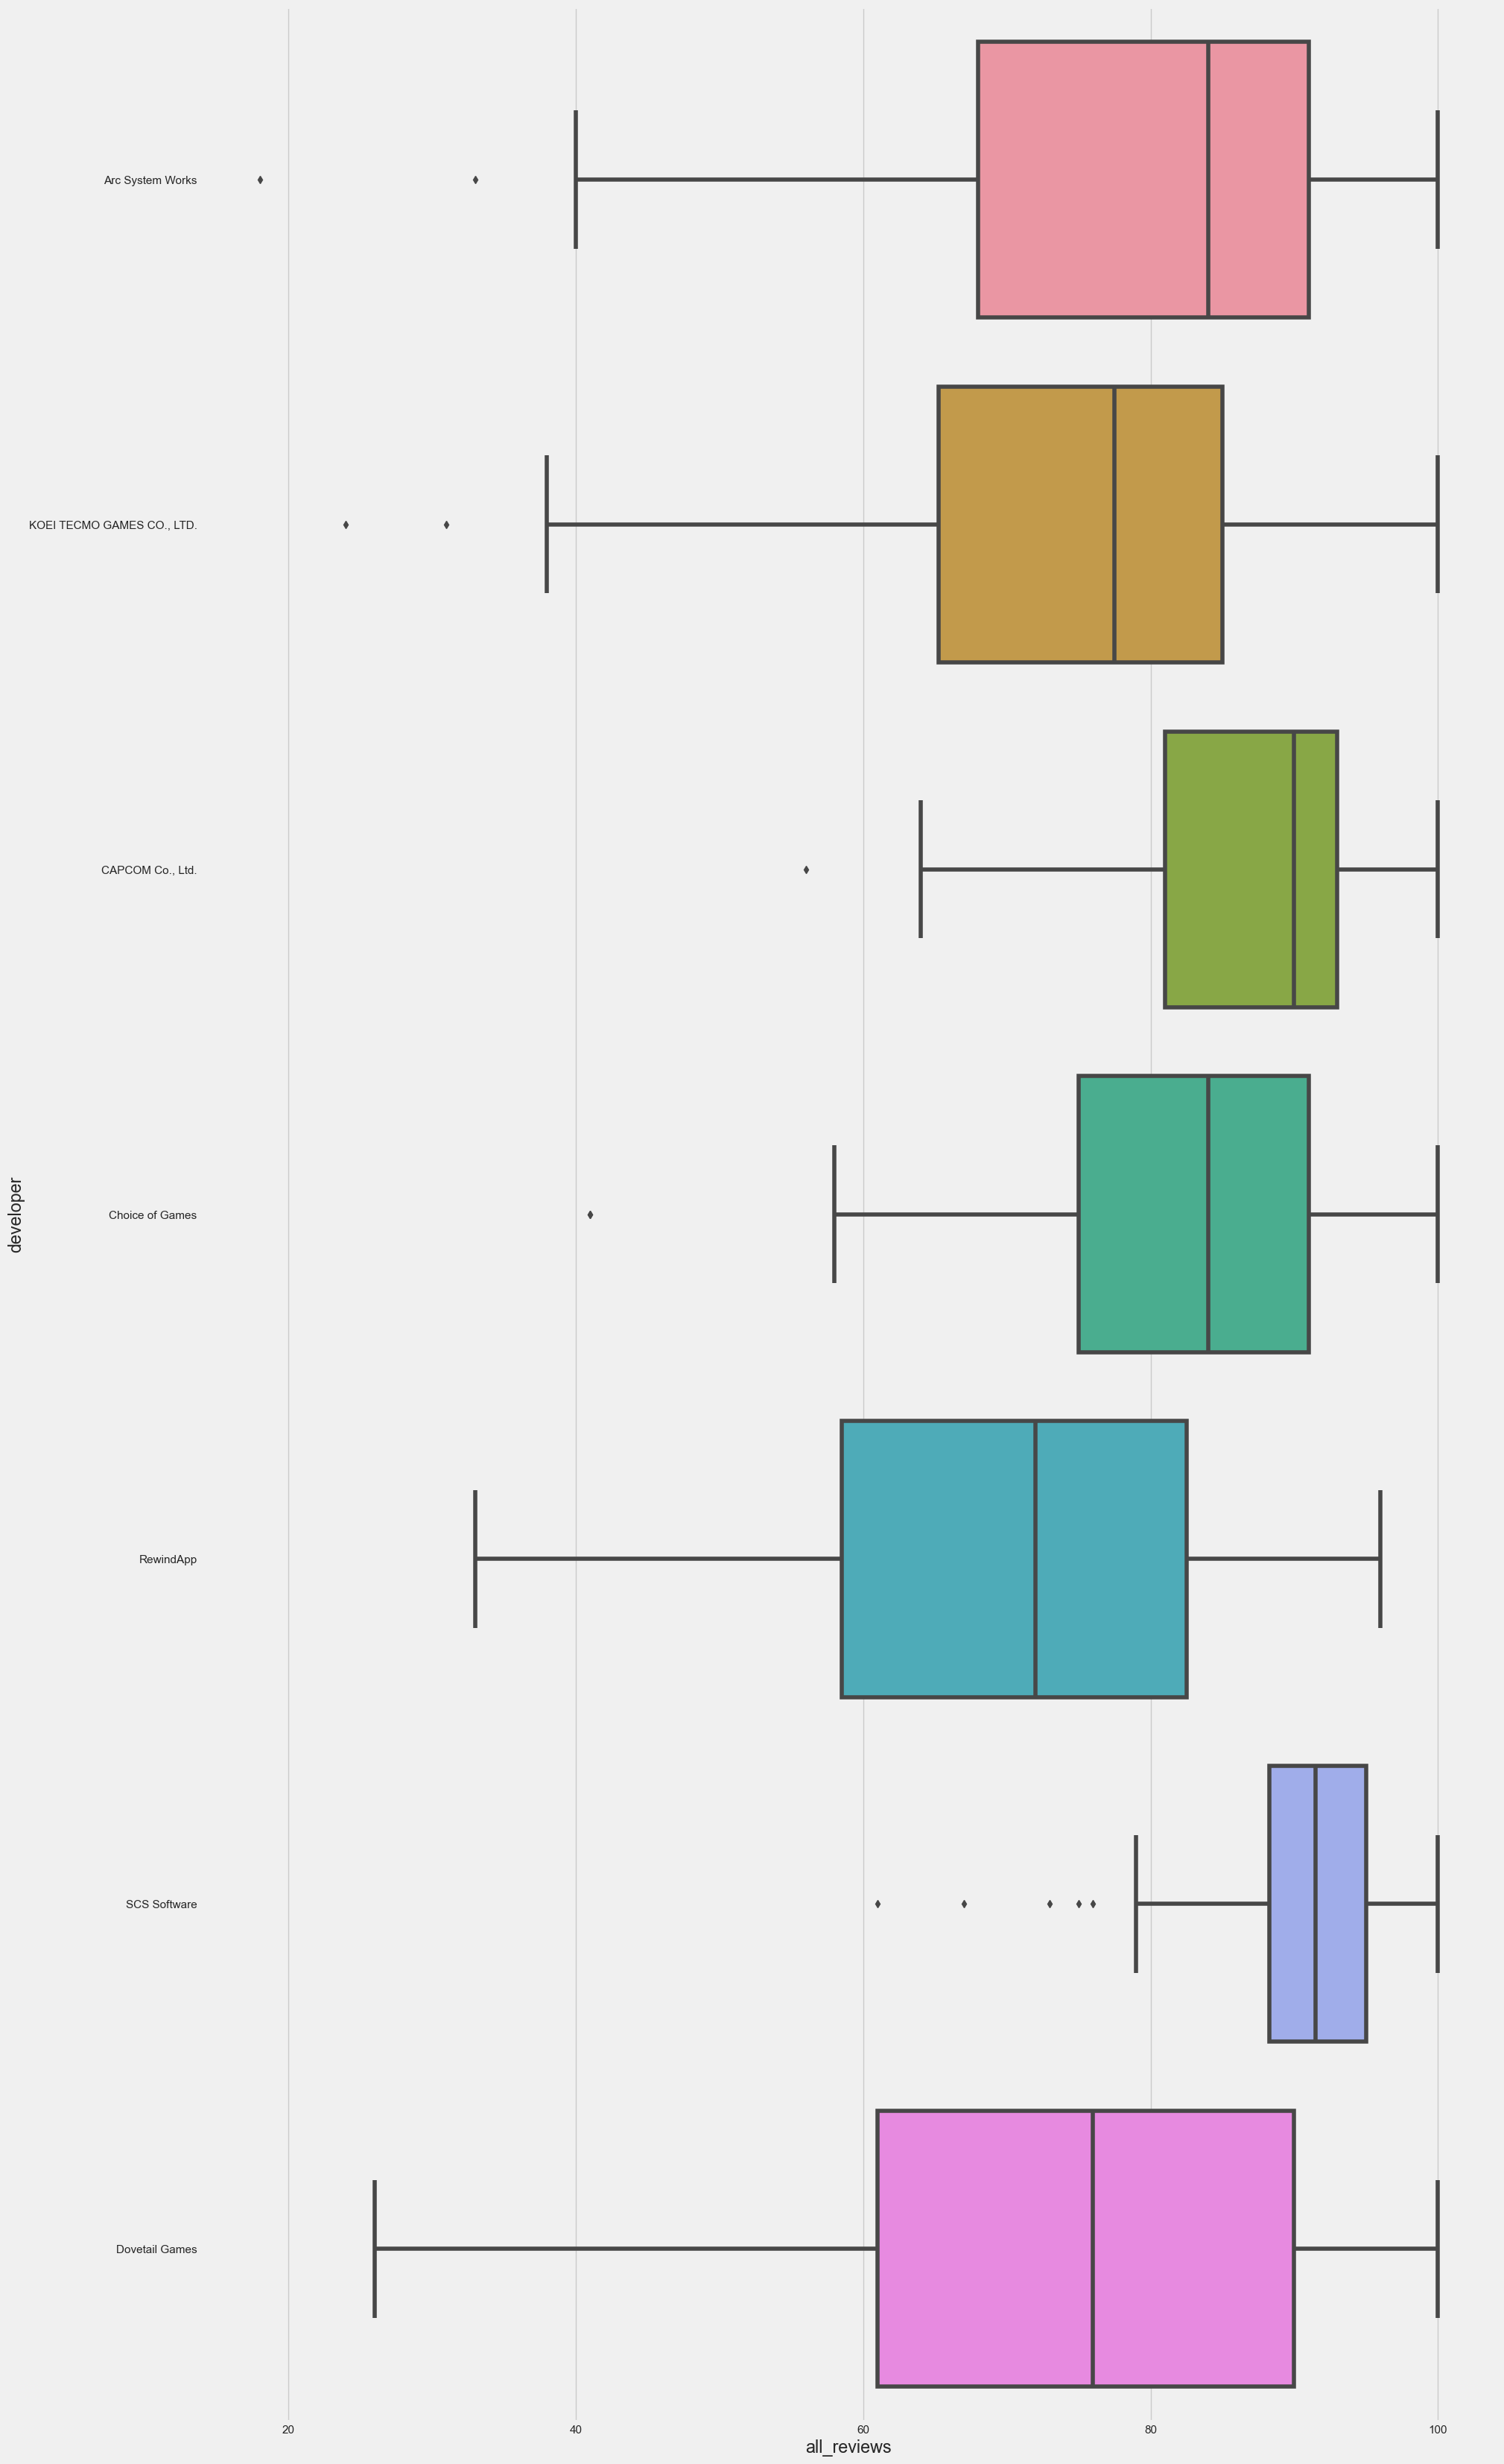

In [24]:
# All reviews vs developer

f = plt.figure(figsize=(20,40))
sb.boxplot(x = "all_reviews", y = "developer", data = moredeveloper, orient = "h", width = 0.8)

#### Categorical - publisher

In [25]:
categoricalgames['publisher'].nunique()

6670

In [26]:
categoricalgames['developer'].value_counts()

Dovetail Games                77
KOEI TECMO GAMES CO., LTD.    58
Choice of Games               57
SCS Software                  42
CAPCOM Co., Ltd.              33
                              ..
Evlanic Entertainment          1
Sigtrap                        1
ColePowered Games              1
Invi Games                     1
Phoesion                       1
Name: developer, Length: 8179, dtype: int64

There are many different `publisher` found in this dataset, so we will only be looking at publisher who had published at `least 30` games so that it would be at least follow a normal distribution via central limit theorem.

In [27]:
(categoricalgames['publisher'].value_counts() >=30).sum()

29

In [28]:
value_counts = categoricalgames['publisher'].value_counts()
to_change = value_counts[value_counts >= 30].index
morepublisher = categoricalgames[categoricalgames['publisher'].isin(to_change)]


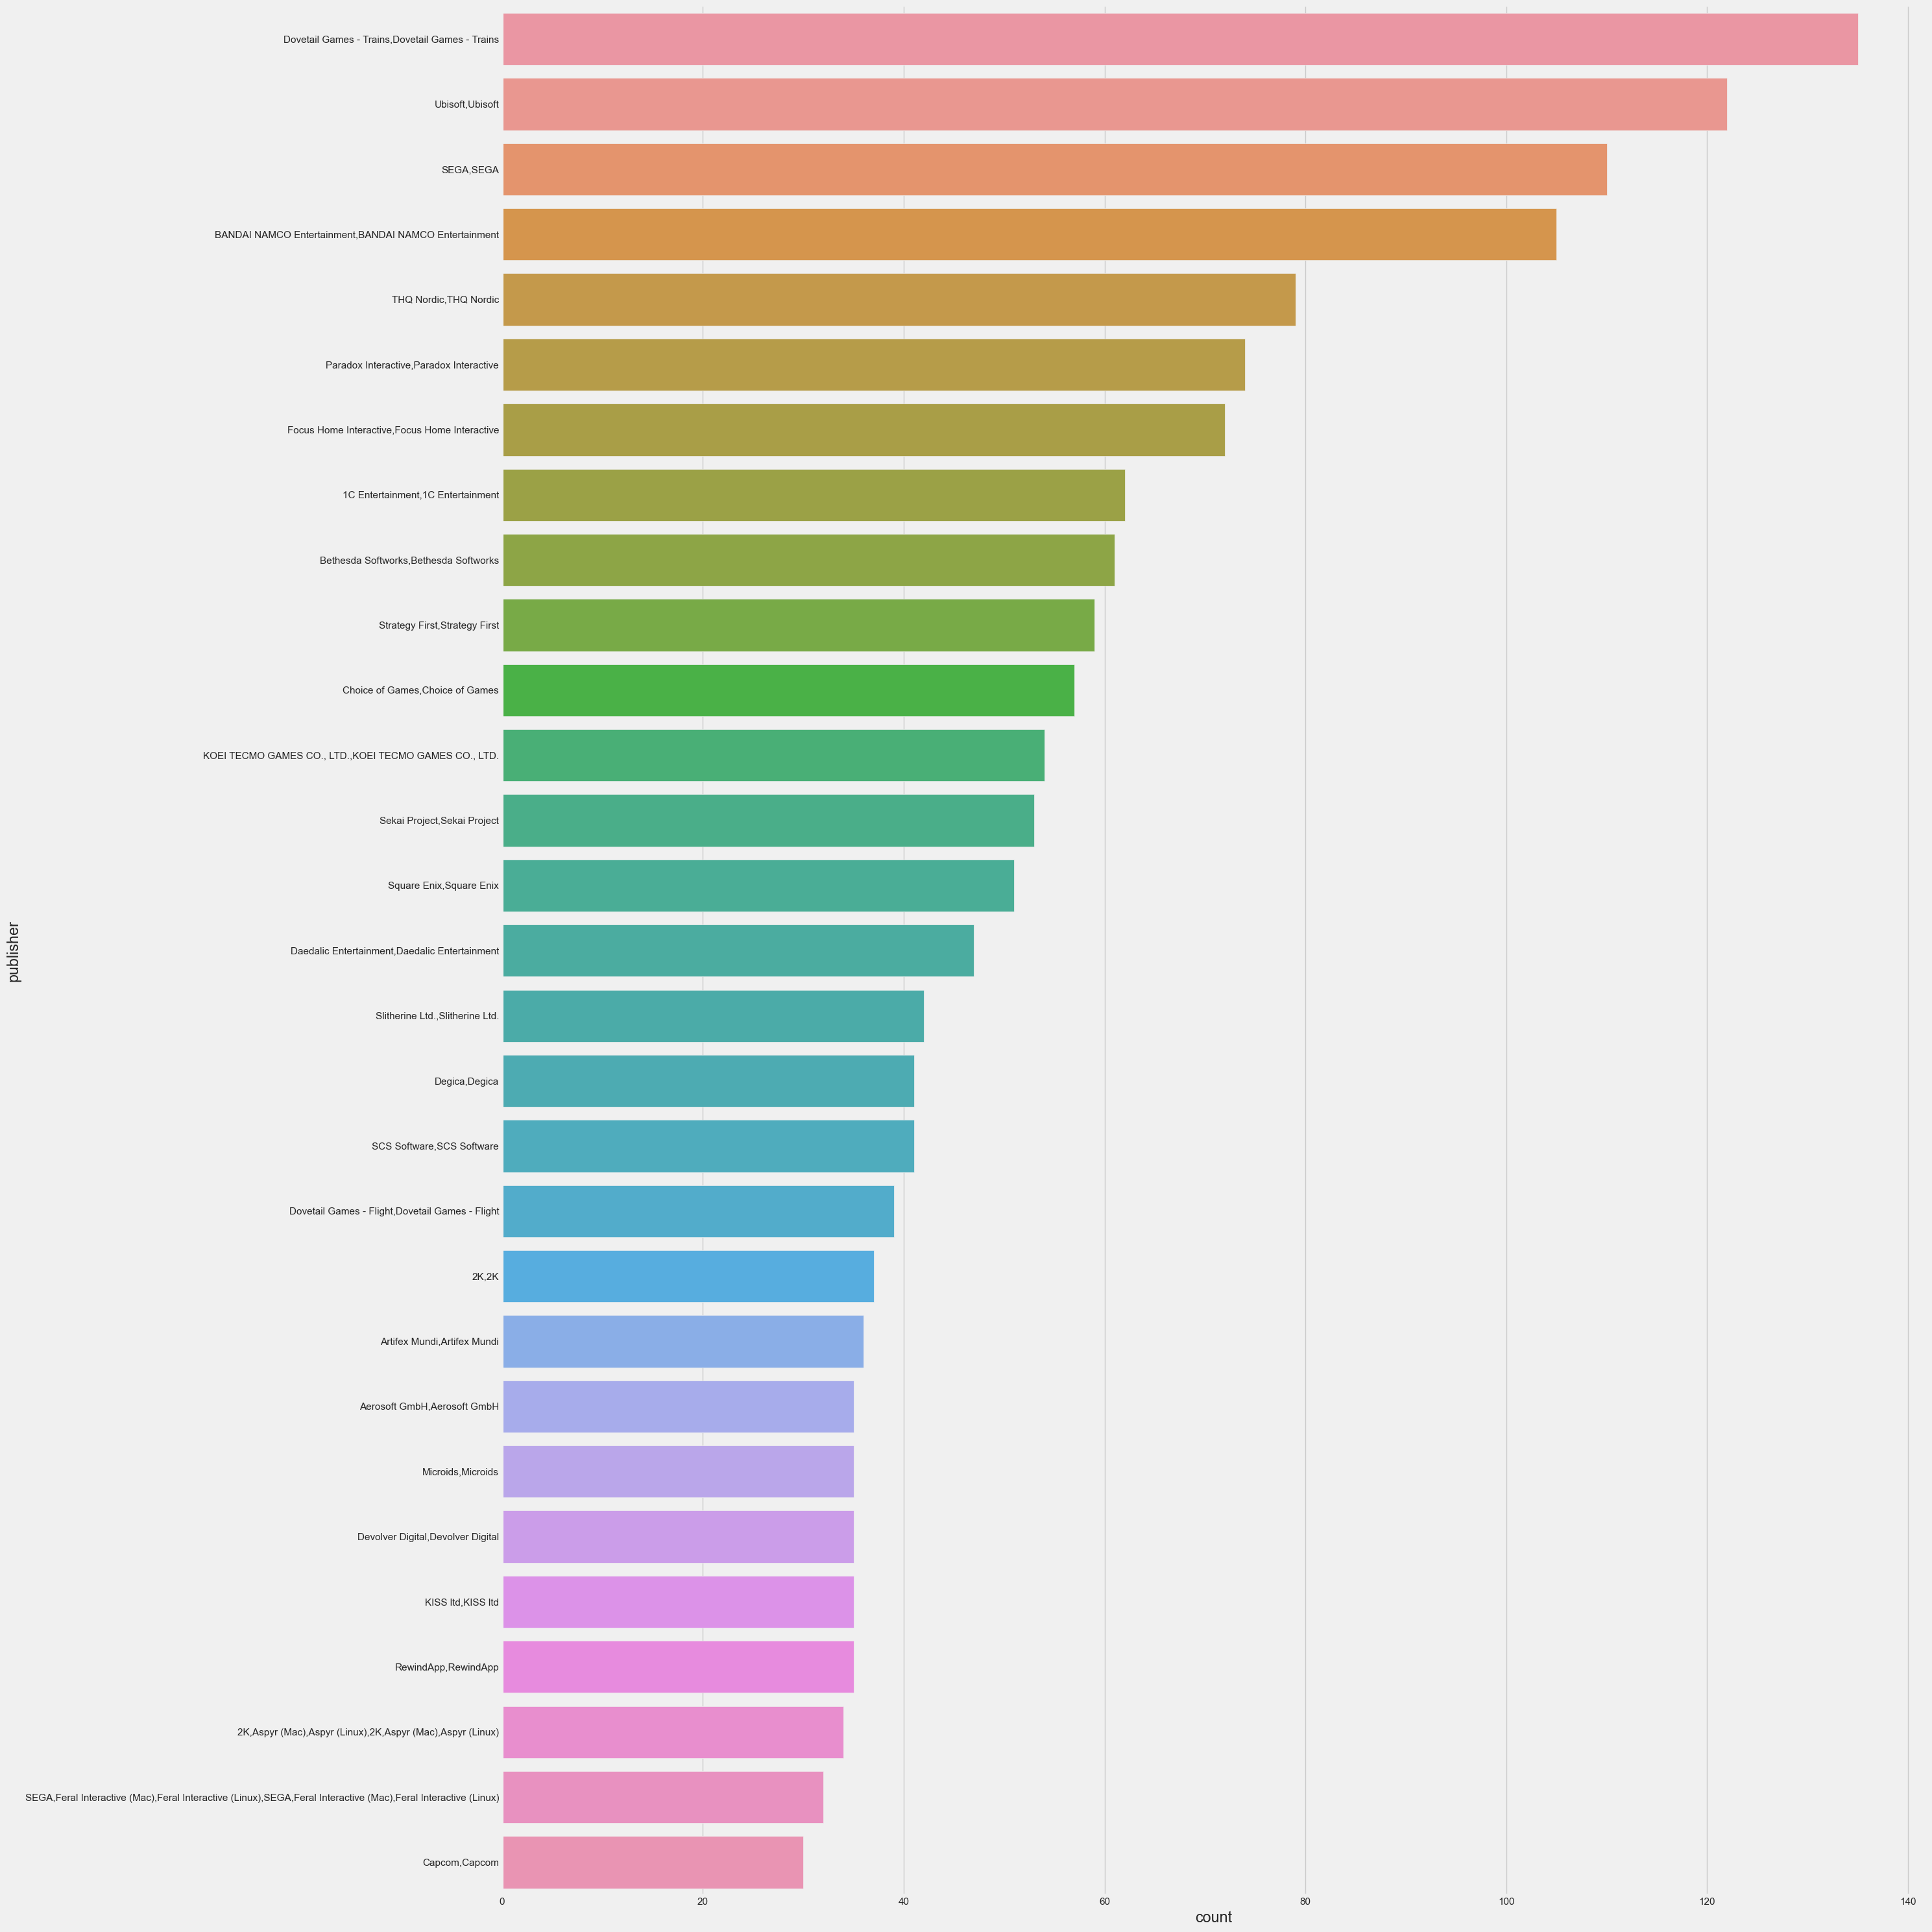

In [29]:
# Catplot for Publisher
sb.catplot(y = "publisher", data = morepublisher, kind = "count", order = morepublisher['publisher'].value_counts().index, height = 30)

<AxesSubplot:xlabel='all_reviews', ylabel='publisher'>

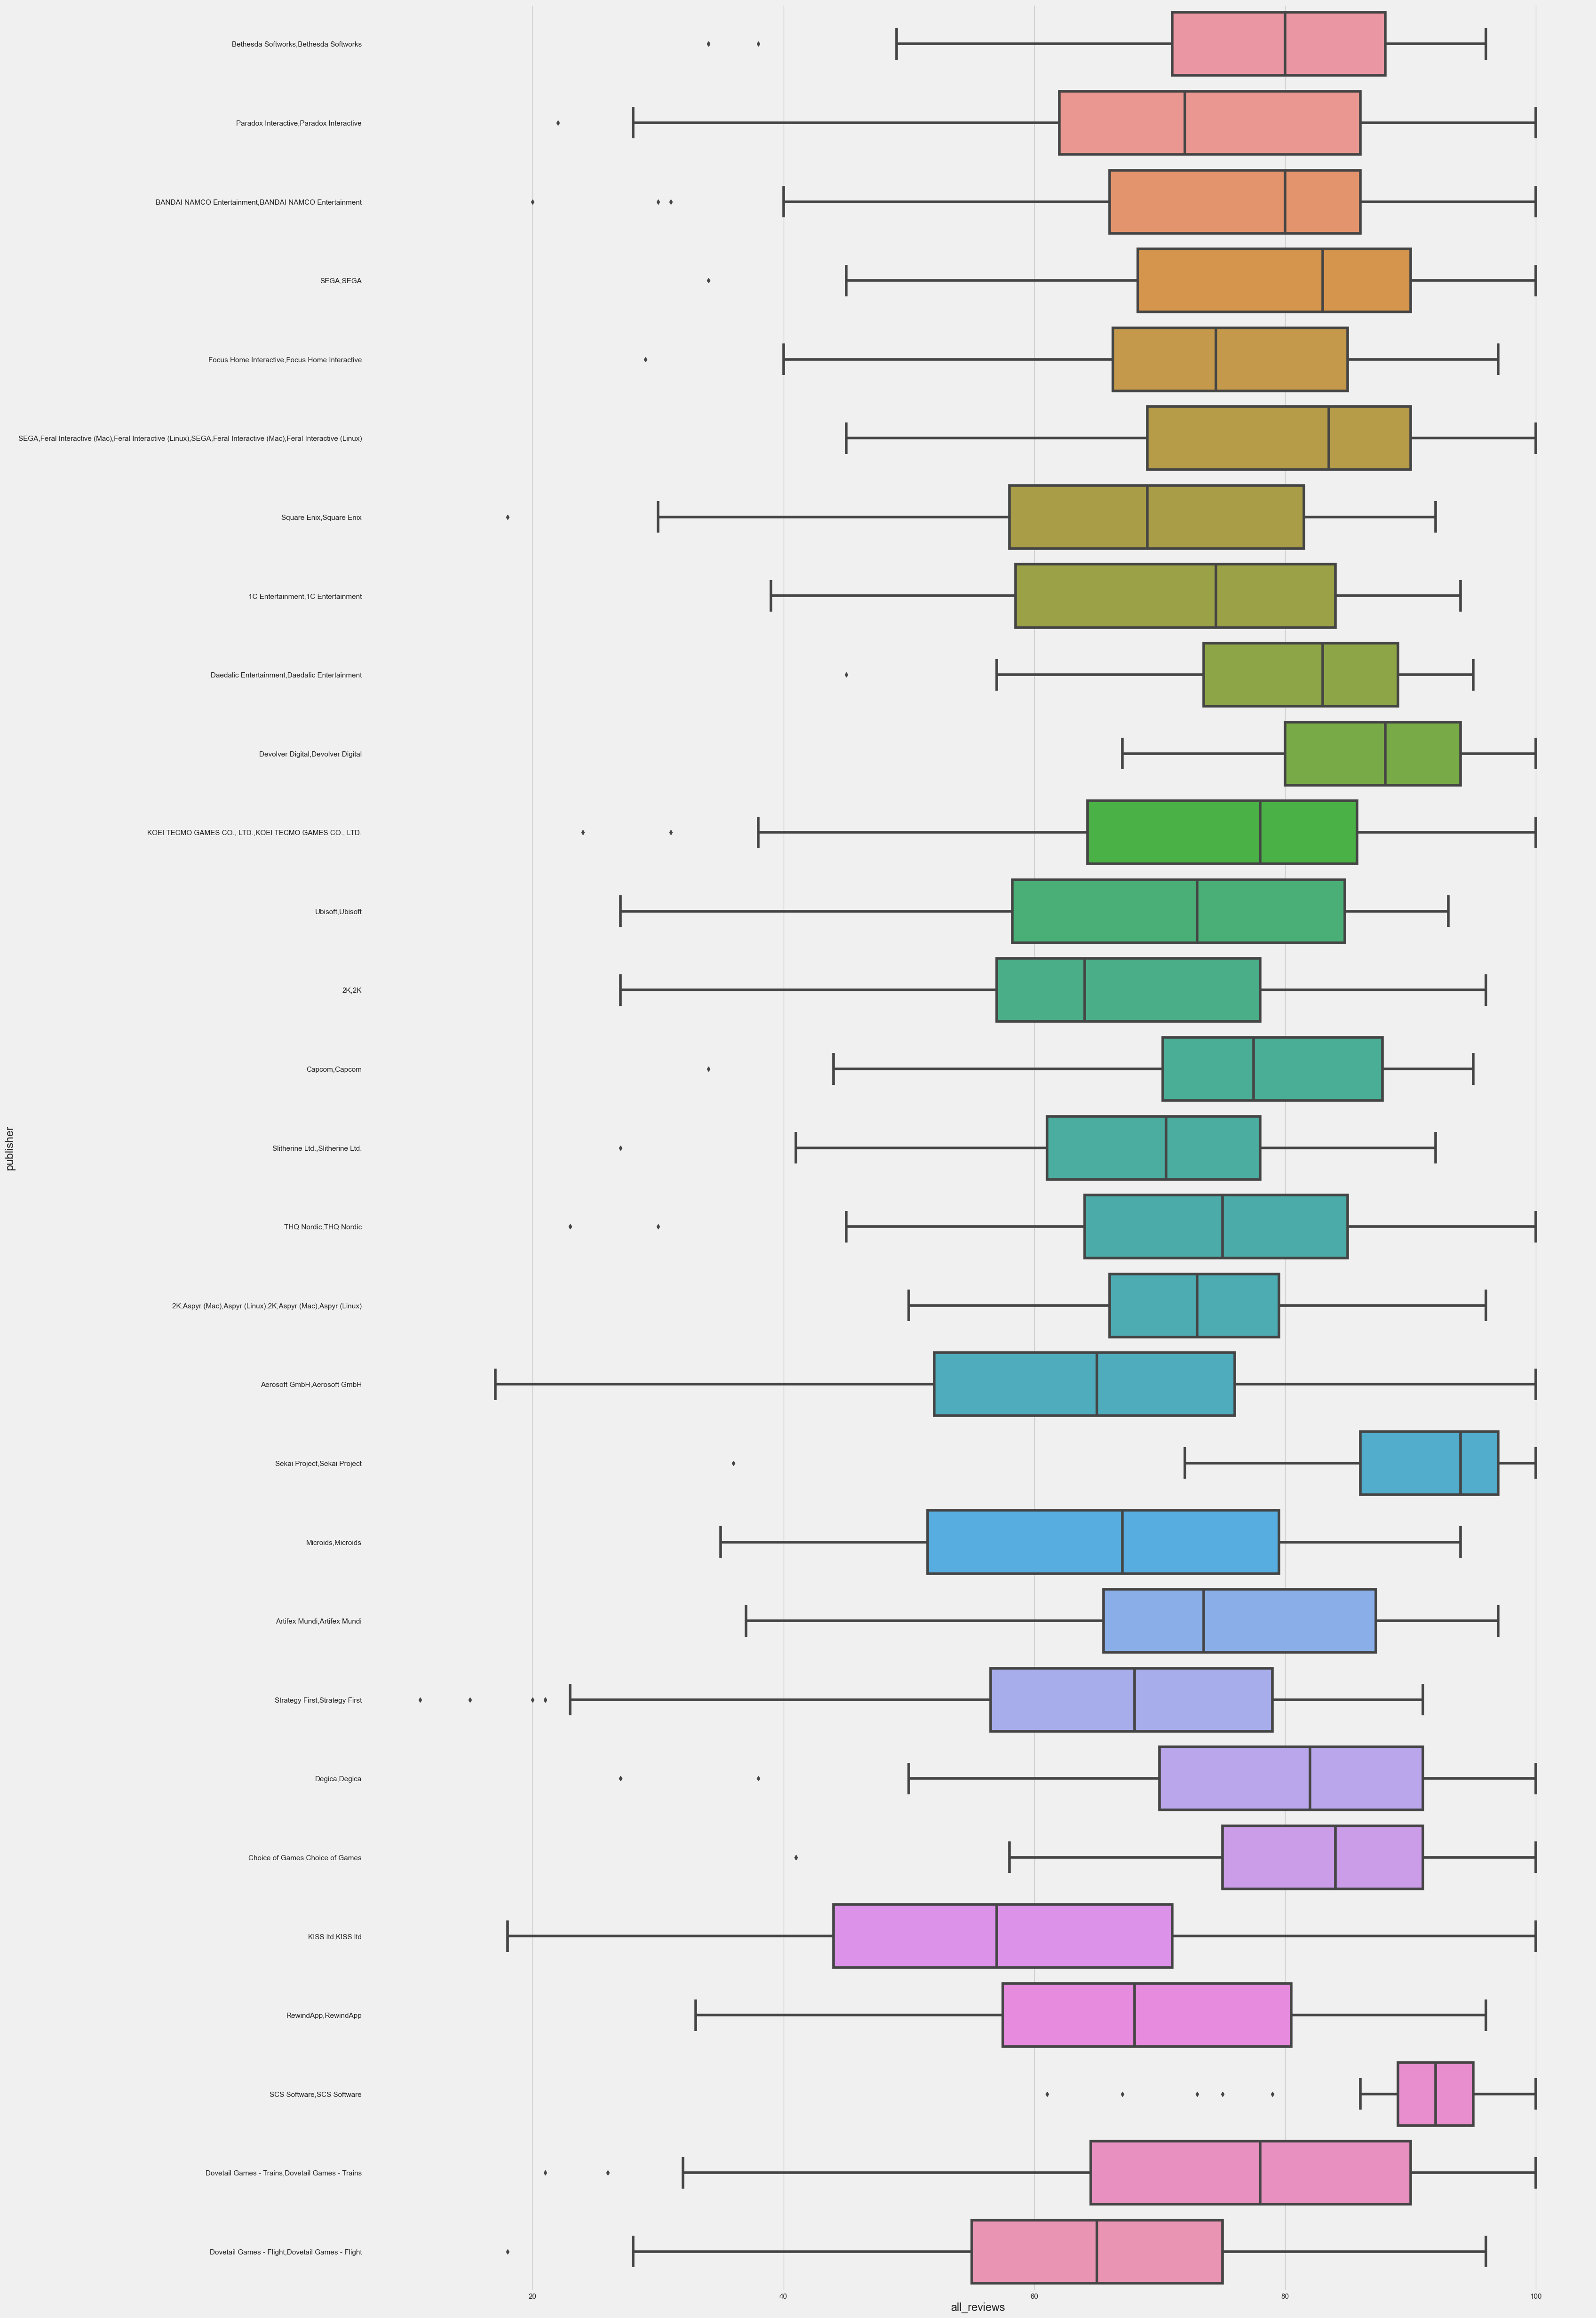

In [30]:
# All reviews vs publisher

f = plt.figure(figsize=(30, 60))
sb.boxplot(x = "all_reviews", y = "publisher", data = morepublisher, orient = "h", width = 0.8)

#### Categorical - add new coumns derived from languages, genre, and popular tags

Since multiple languages, multiple genre, multiple popular tags are attached to one movie, it is difficult to see observe if there is a relationship between all reviews and them. Thus, to see if there is a correlation between languages, genre, popular tags and vote average, the first language, first genre, first popular tag in thier respective list are taken to compare, as the languages, genres, and popular tags do not seem to be arranged in the alphabetical order or by the id order, so there may be another reason that the they are arranged in such a way, with one reason being it was decided as the most relevant language, genre, and popular tag associated to the games.

In [31]:
categoricalgames['first_language'] = gamesdata['languages'].str[0]
categoricalgames['first_popular_tag'] = gamesdata['popular_tags'].str[0]
categoricalgames['first_genre'] = gamesdata['genre'].str[0]
categoricalgames.head()

C:\Users\User\AppData\Local\Temp\ipykernel_5816\328189291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricalgames['first_language'] = gamesdata['languages'].str[0]
C:\Users\User\AppData\Local\Temp\ipykernel_5816\328189291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricalgames['first_popular_tag'] = gamesdata['popular_tags'].str[0]
C:\Users\User\AppData\Local\Temp\ipykernel_5816\328189291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,developer,publisher,popular_tags,languages,genre,mature_content,all_reviews,first_language,first_popular_tag,first_genre
0,id Software,"Bethesda Softworks,Bethesda Softworks","[Great Soundtrack, Action, Demons, Atmospheric...","[Polish, Russian, German, Spanish - Spain, Por...",[Action],False,92,Polish,Great Soundtrack,Action
1,PUBG Corporation,"PUBG Corporation,PUBG Corporation","[PvP, Battle Royale, Action, Strategy, Surviva...","[Polish, Simplified Chinese, Portuguese, Korea...","[Massively Multiplayer, Action, Adventure]",True,49,Polish,PvP,Massively Multiplayer
2,Harebrained Schemes,"Paradox Interactive,Paradox Interactive","[Futuristic, Great Soundtrack, Action, Story R...","[French, English, Russian, German]","[Strategy, Action, Adventure]",False,71,French,Futuristic,Strategy
3,Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","[PvP, Action, Open World, Survival, Atmospheri...","[Simplified Chinese, Russian, German, Spanish ...","[Massively Multiplayer, Action, Adventure]",False,61,Simplified Chinese,PvP,Massively Multiplayer
4,CCP,"CCP,CCP","[PvP, Economy, Action, MMORPG, Open World, Spa...","[French, English, Russian, German]","[Massively Multiplayer, Action, Strategy, Free...",False,74,French,PvP,Massively Multiplayer


#### Categorical - first language

In [32]:
categoricalgames['first_language'].value_counts()

English                                                         6348
Polish                                                          1706
Simplified Chinese                                              1582
German                                                           608
French                                                           505
Russian                                                          377
Japanese                                                         298
Traditional Chinese                                              265
Dutch                                                            158
Korean                                                           154
Spanish - Spain                                                  118
Portuguese                                                       111
Portuguese - Brazil                                               55
Italian                                                           48
Ukrainian                         

In [33]:
# replace #lang_#lang_#lang_english**#lang_full_audio*#lang_full_audio with the mode which is English
categoricalgames['first_language'] = categoricalgames['first_language'].replace('#lang_#lang_#lang_english**#lang_full_audio*#lang_full_audio', 'English')

C:\Users\User\AppData\Local\Temp\ipykernel_5816\3847732596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricalgames['first_language'] = categoricalgames['first_language'].replace('#lang_#lang_#lang_english**#lang_full_audio*#lang_full_audio', 'English')


In [34]:
categoricalgames['first_language'].value_counts()

English                    6349
Polish                     1706
Simplified Chinese         1582
German                      608
French                      505
Russian                     377
Japanese                    298
Traditional Chinese         265
Dutch                       158
Korean                      154
Spanish - Spain             118
Portuguese                  111
Portuguese - Brazil          55
Italian                      48
Ukrainian                    30
Greek                        23
Finnish                      15
Thai                         11
Spanish - Latin America       8
Czech                         5
Arabic                        4
Swedish                       3
Bulgarian                     3
Hungarian                     1
Turkish                       1
Norwegian                     1
Name: first_language, dtype: int64

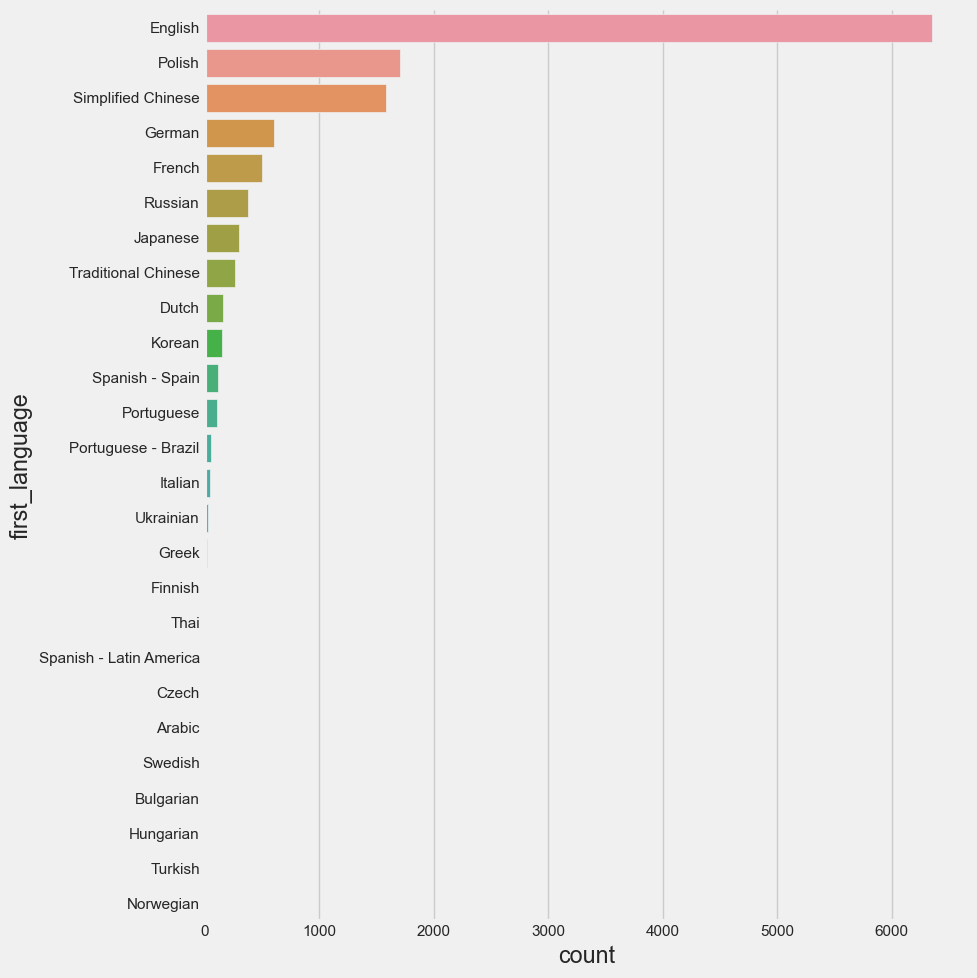

In [35]:
sb.catplot(y = "first_language", data = categoricalgames, kind = "count",  order = categoricalgames['first_language'].value_counts().index, height = 10 )

<AxesSubplot:xlabel='all_reviews', ylabel='first_language'>

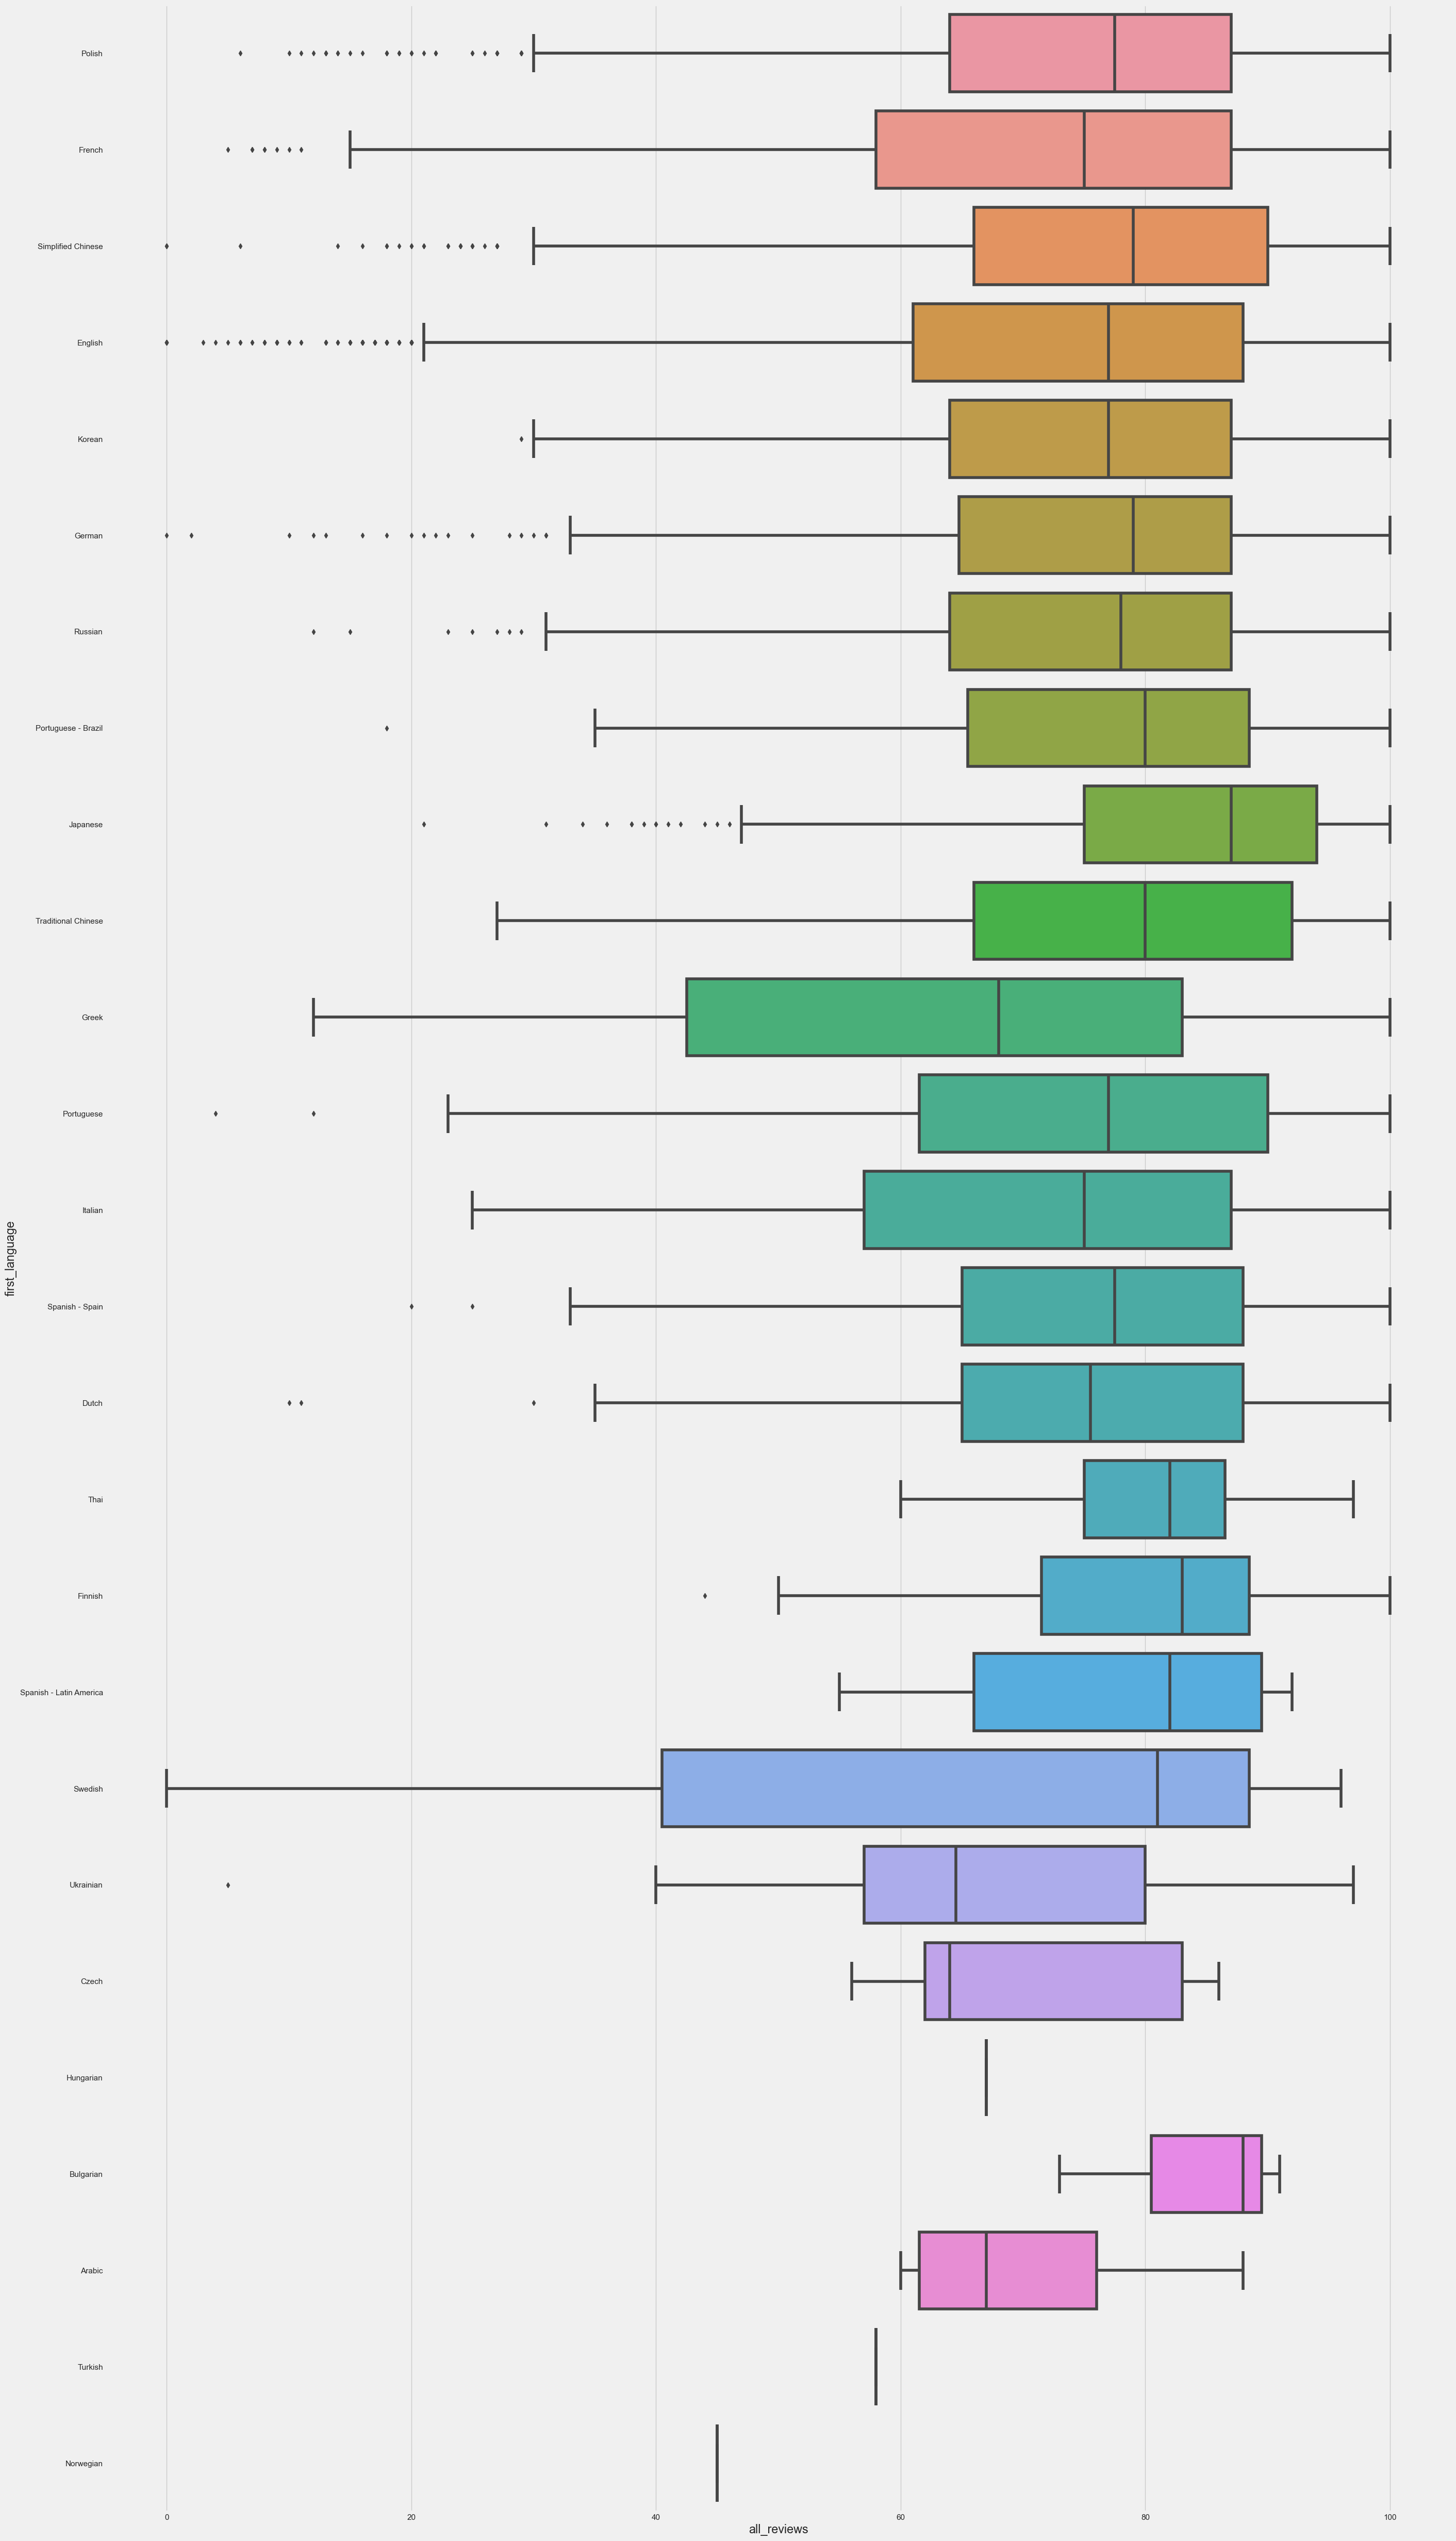

In [36]:
# All reviews vs languages

f = plt.figure(figsize=(30, 60))
sb.boxplot(x = "all_reviews", y = "first_language", data = categoricalgames, orient = "h", width = 0.8)

#### Categorical - first genre

In [37]:
categoricalgames['first_genre'].nunique()

21

In [38]:
categoricalgames['first_genre'].value_counts()

Casual                   3352
Action                   2189
Indie                    1847
Simulation               1307
RPG                       976
Strategy                  770
Free to Play              553
Massively Multiplayer     455
Sports                    239
Adventure                 234
Racing                    164
Design & Illustration      72
Utilities                  65
Education                  47
Video Production           47
Audio Production           12
Animation & Modeling        9
Software Training           5
Valve                       1
Game Development            1
Web Publishing              1
Name: first_genre, dtype: int64

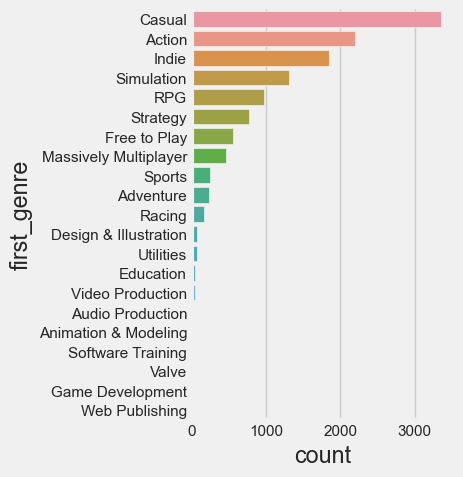

In [39]:
sb.catplot(y = "first_genre", data = categoricalgames, kind = "count",  order = categoricalgames['first_genre'].value_counts().index )

<AxesSubplot:xlabel='all_reviews', ylabel='first_genre'>

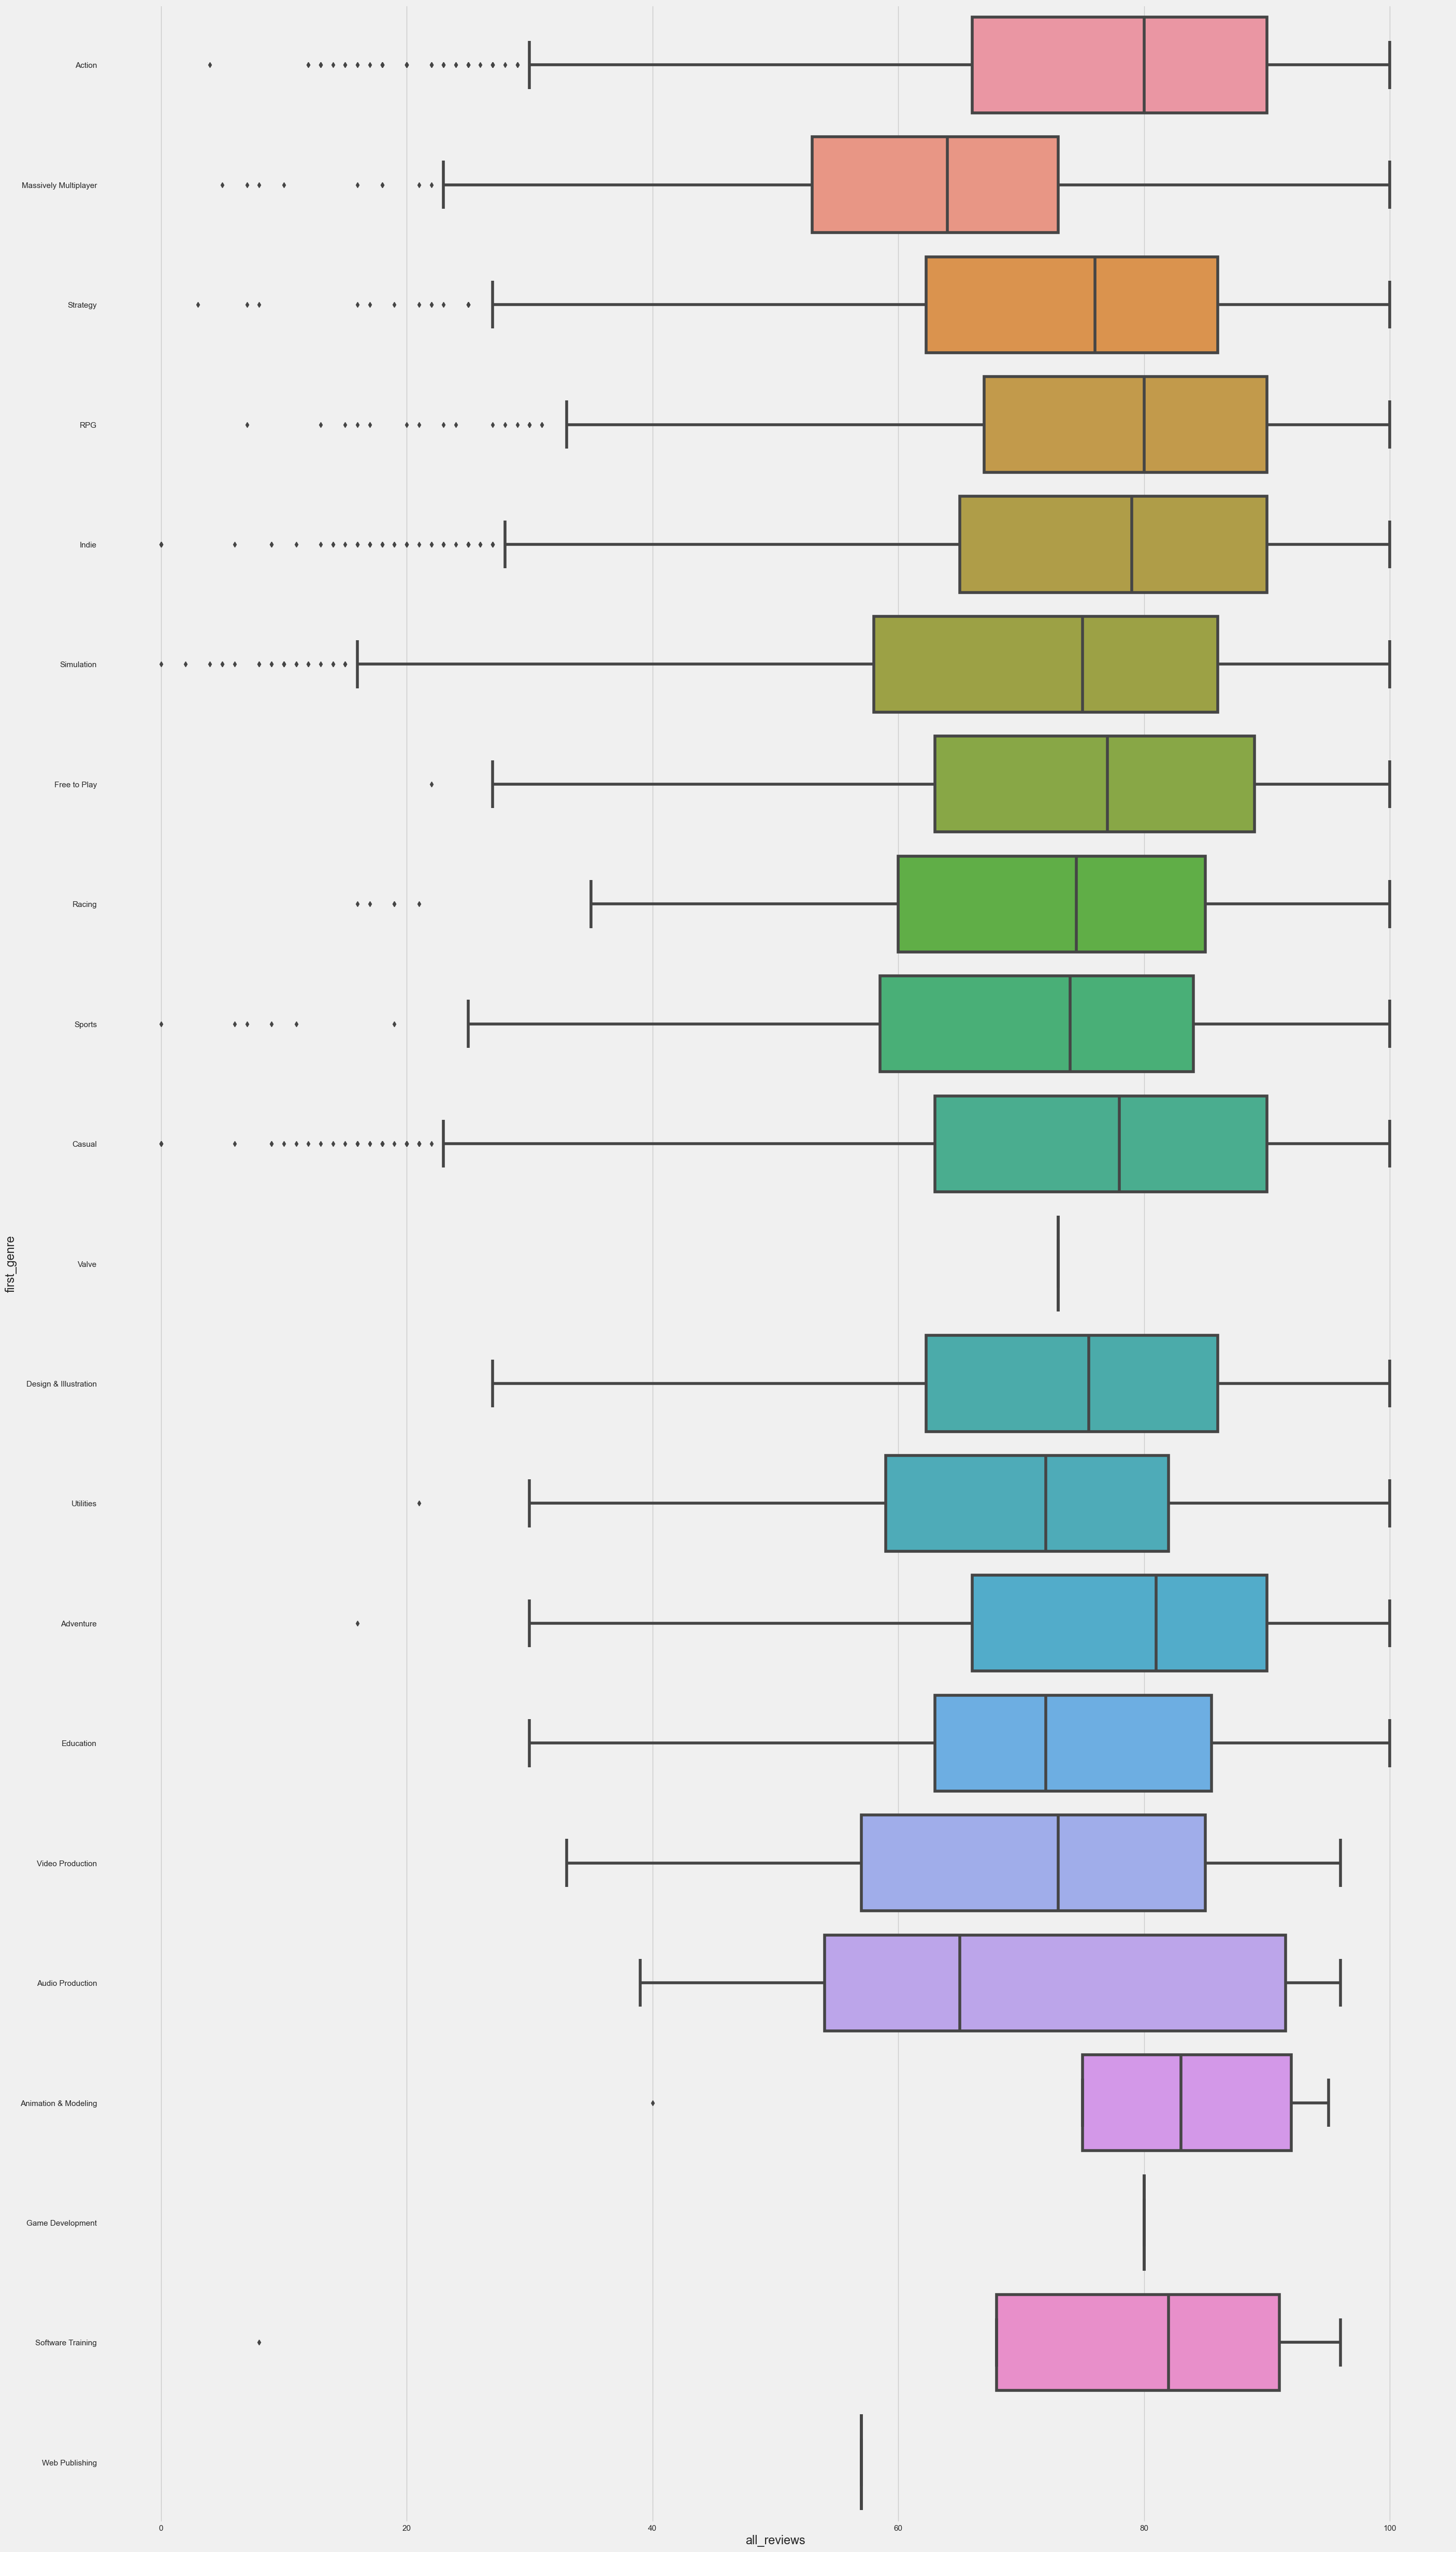

In [40]:
# All reviews vs genre

f = plt.figure(figsize=(30, 60))
sb.boxplot(x = "all_reviews", y = "first_genre", data = categoricalgames, orient = "h", width = 0.8)

#### Categorical - popular tags

In [41]:
categoricalgames['first_popular_tag'].nunique()

237

In [42]:
categoricalgames['first_popular_tag'].value_counts()

Casual              3170
Action              1633
Great Soundtrack     926
Violent              569
Simulation           502
                    ... 
Golf                   1
Voxel                  1
Conspiracy             1
Tutorial               1
Mythology              1
Name: first_popular_tag, Length: 237, dtype: int64

There are many different `first_popular_tag` found in this dataset, so we will only be looking at publisher who had published at `least 30` games so that it would be at least follow a normal distribution via central limit theorem.

In [43]:
value_counts = categoricalgames['first_popular_tag'].value_counts()
to_change = value_counts[value_counts >= 30].index
morepopulartags = categoricalgames[categoricalgames['first_popular_tag'].isin(to_change)]

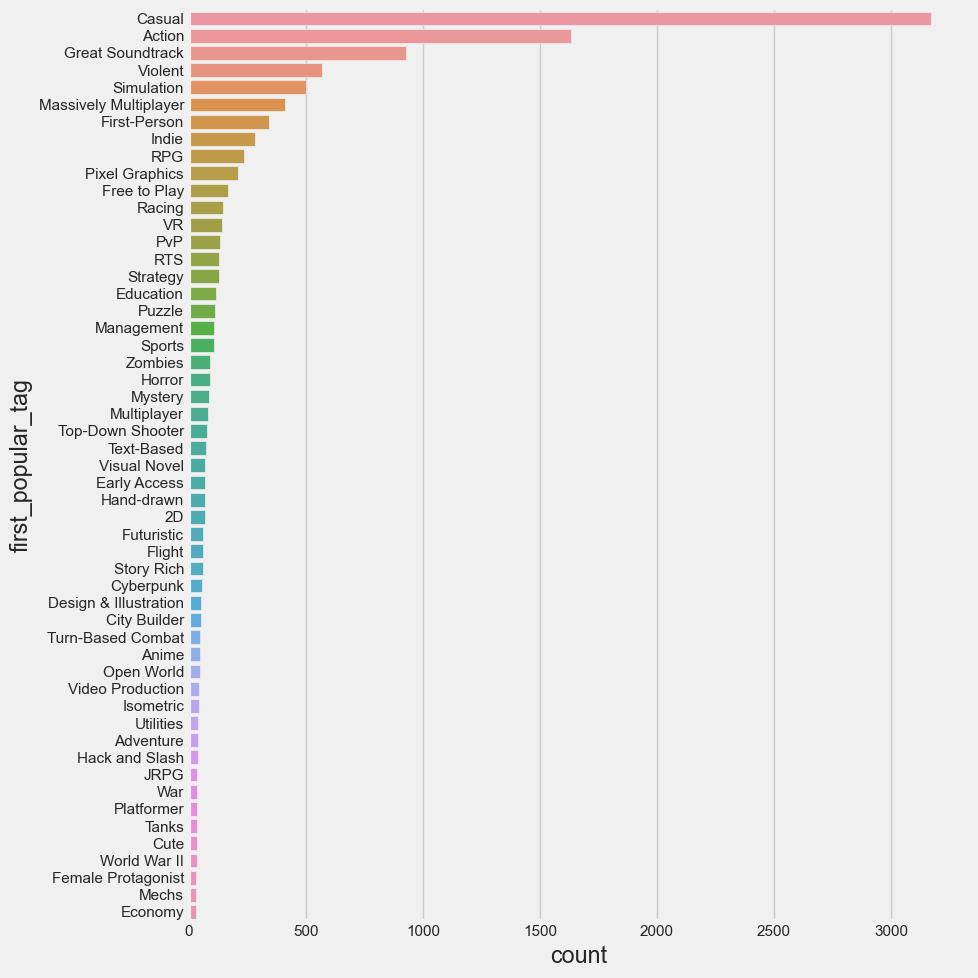

In [44]:
sb.catplot(y = "first_popular_tag", data = categoricalgames, kind = "count",  order = morepopulartags['first_popular_tag'].value_counts().index, height = 10 )

<AxesSubplot:xlabel='all_reviews', ylabel='first_popular_tag'>

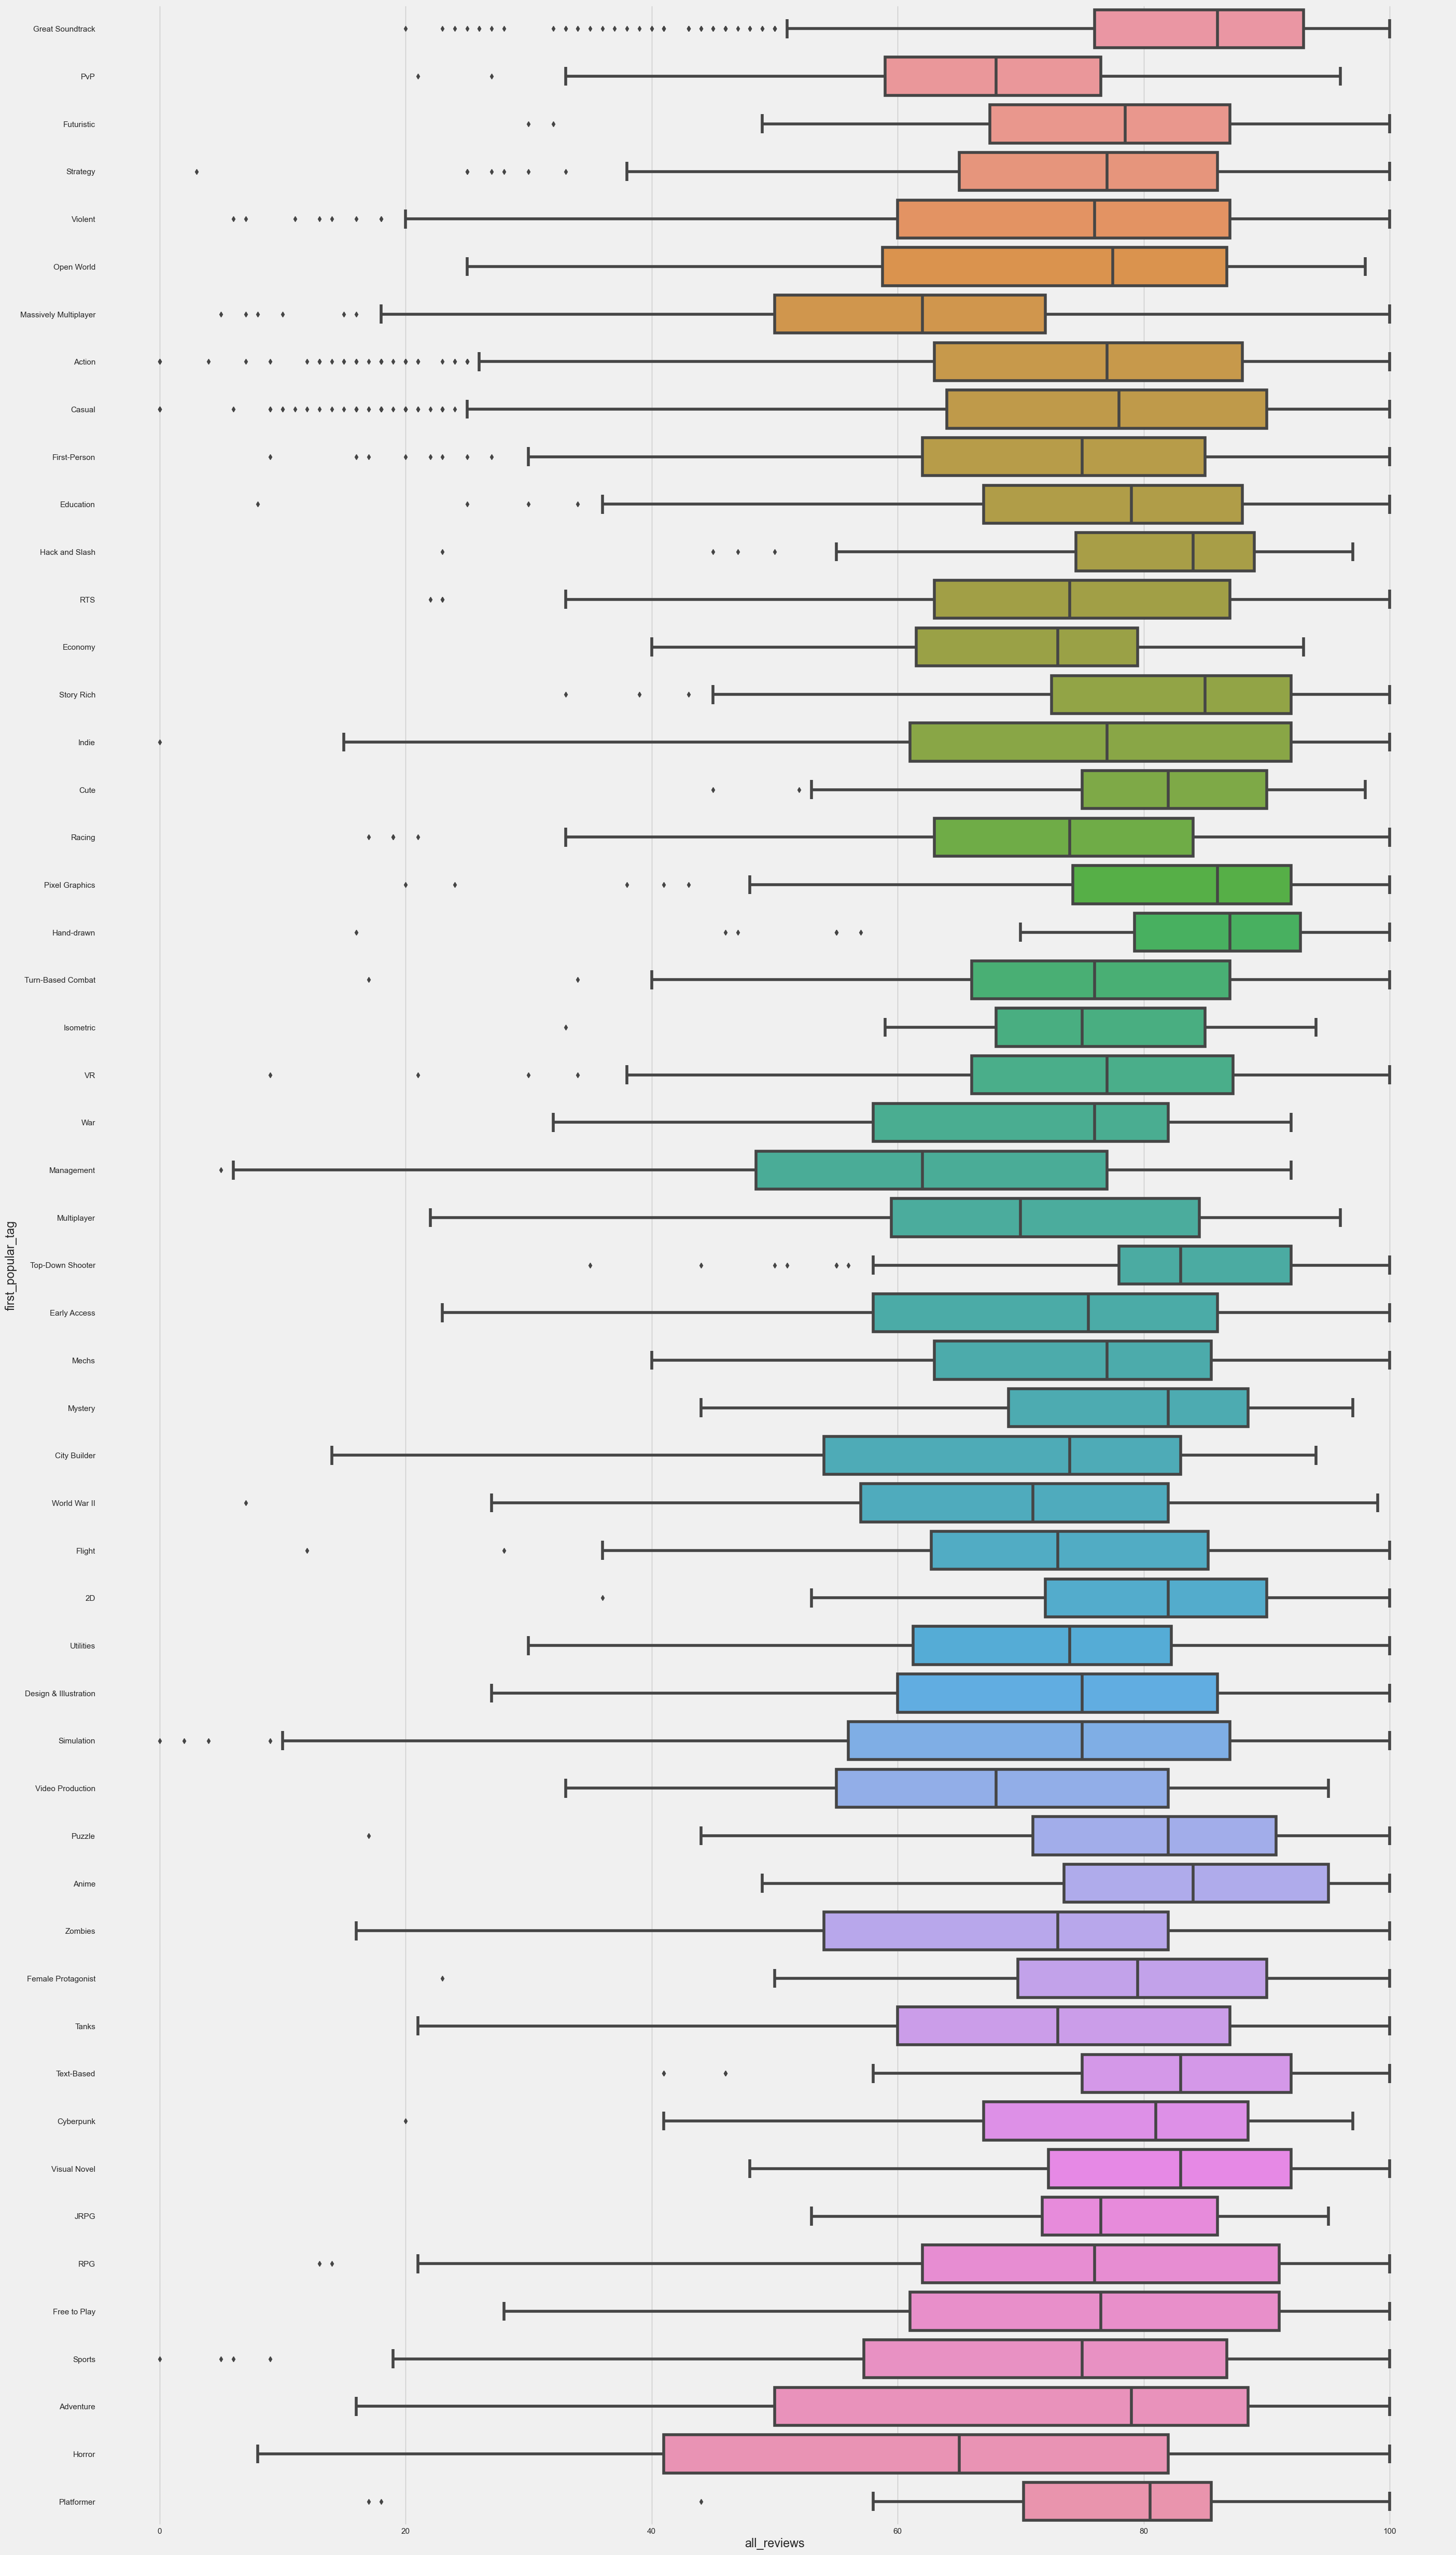

In [45]:
# All reviews vs popular tags

f = plt.figure(figsize=(30, 60))
sb.boxplot(x = "all_reviews", y = "first_popular_tag", data = morepopulartags, orient = "h", width = 0.8)